In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from src.score import *

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [4]:
DATADIR = '/data/weather-benchmark/5.625deg/geopotential_500/'
PREDDIR = '/data/weather-benchmark/predictions/'

In [21]:
z500_valid = load_test_data(DATADIR)

## Load forecasts

In [22]:
fc_persistence = xr.open_dataset(f'{PREDDIR}/fc_persistence.nc').z
fc_climatology = xr.open_dataset(f'{PREDDIR}/fc_climatology.nc').z
fc_weekly_climatology = xr.open_dataset(f'{PREDDIR}/fc_weekly_climatology.nc').z

In [23]:
fc_lr_3d = xr.open_dataset(f'{PREDDIR}/fc_lr_3d.nc').__xarray_dataarray_variable__
fc_lr_5d = xr.open_dataset(f'{PREDDIR}/fc_lr_5d.nc').__xarray_dataarray_variable__
fc_lr_6h_iter = xr.open_dataset(f'{PREDDIR}/fc_lr_6h_iter.nc').__xarray_dataarray_variable__

In [24]:
fc_tigge = xr.open_dataset(f'{PREDDIR}/tigge_5.625deg.nc').__xarray_dataarray_variable__

In [25]:
fc_cnn_3d = xr.open_dataset(f'{PREDDIR}/fc_cnn_3d.nc').__xarray_dataarray_variable__
fc_cnn_5d = xr.open_dataset(f'{PREDDIR}/fc_cnn_5d.nc').__xarray_dataarray_variable__
fc_cnn_6h_iter = xr.open_dataset(f'{PREDDIR}/fc_cnn_6h_iter.nc').__xarray_dataarray_variable__

## Visualize forecasts

In [26]:
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [30]:
ds = hv.Dataset(z500_valid.isel(time=slice(0, 121, 6)))
img = ds.to(hv.Image).options(cmap='gist_ncar', fig_size=500)

:HoloMap   [time]
   :Image   [lon,lat]   (z)
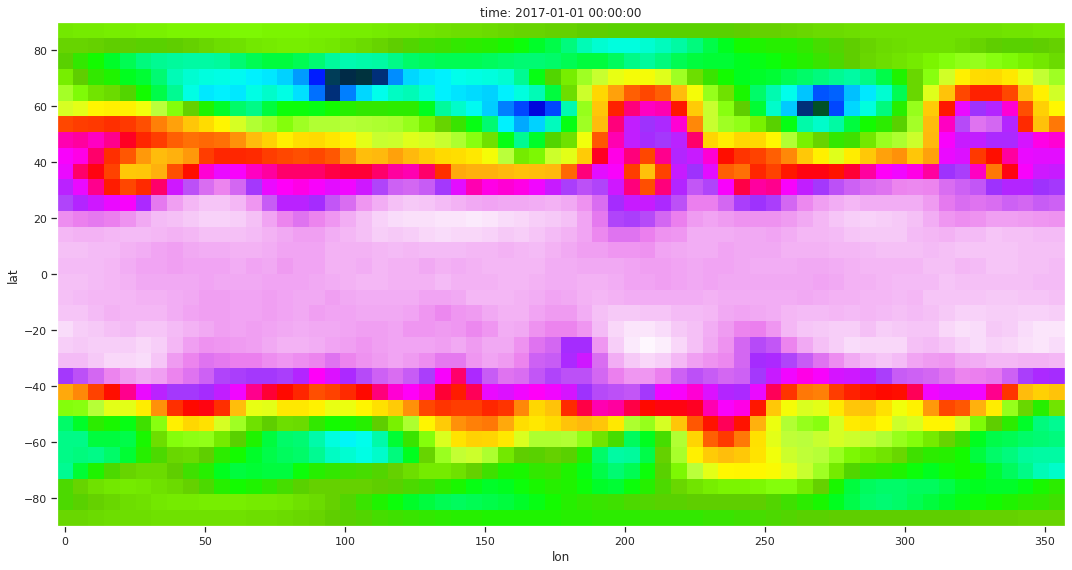
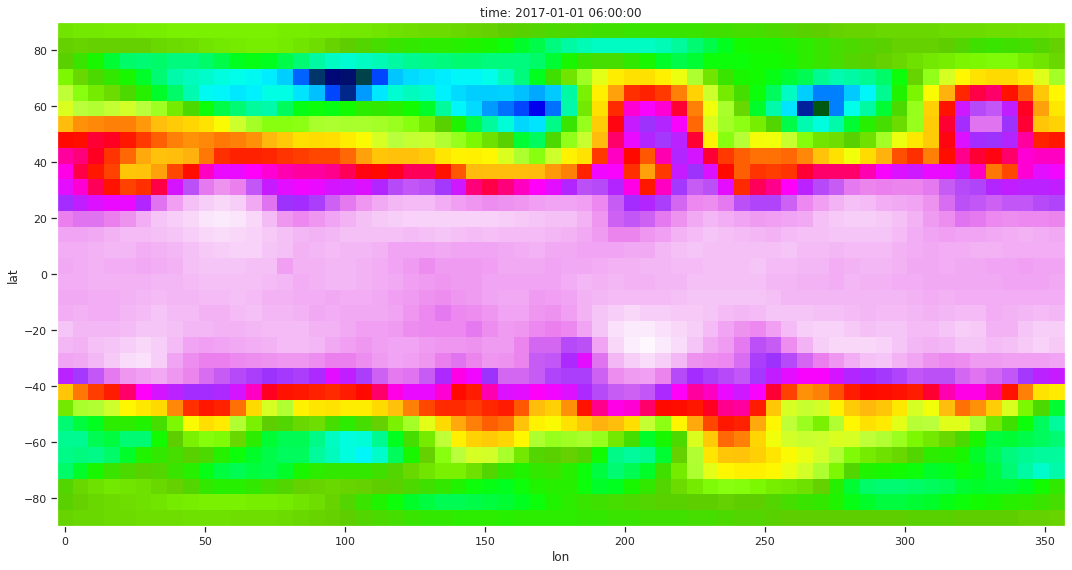
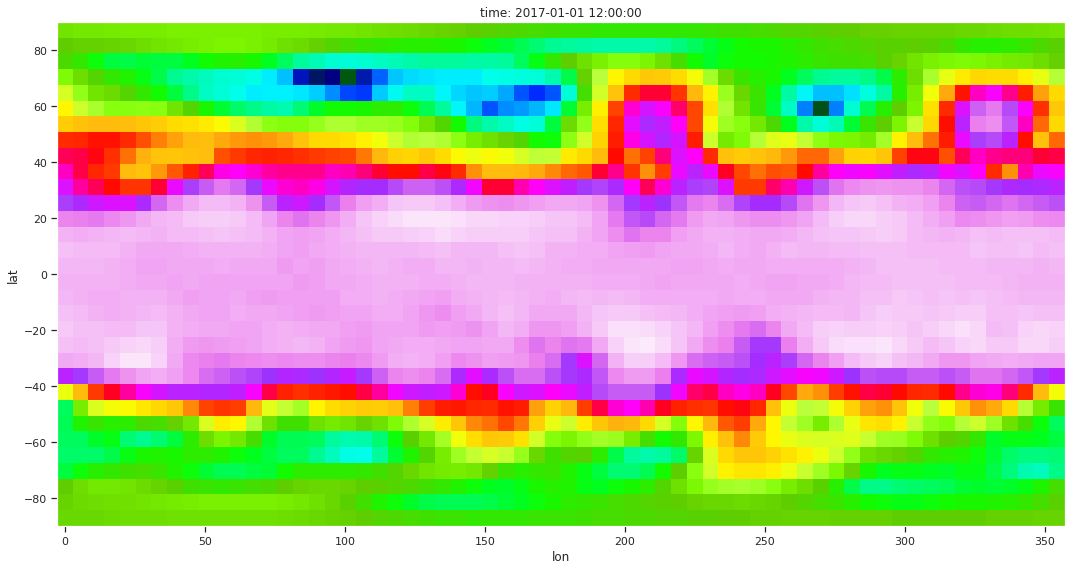
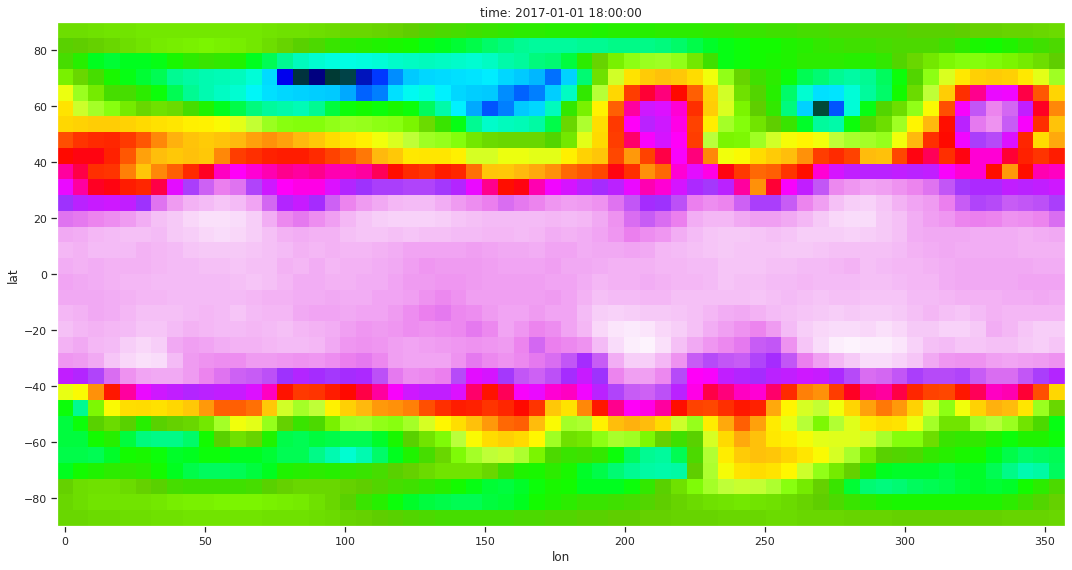
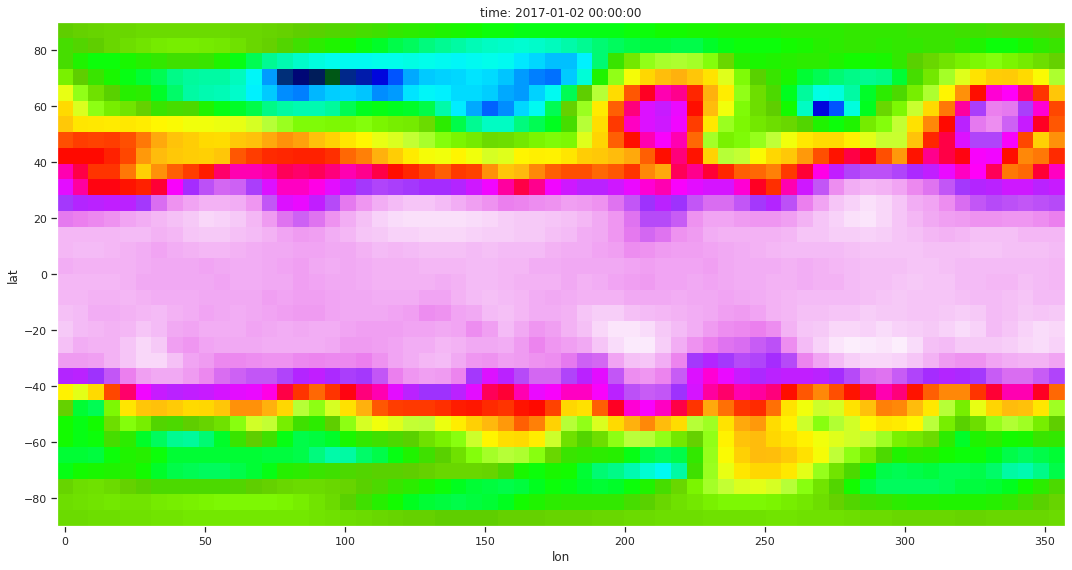
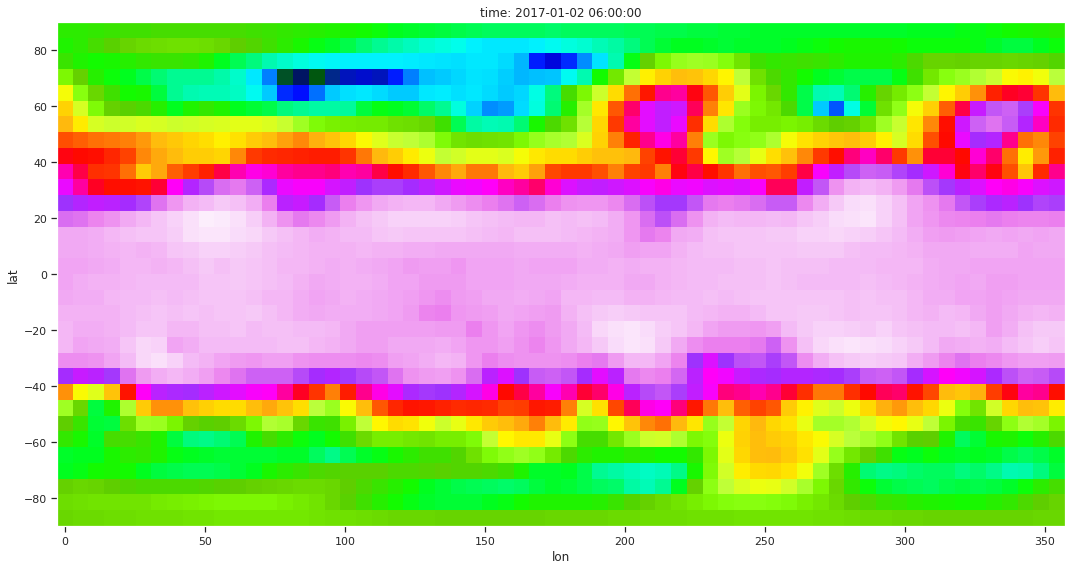
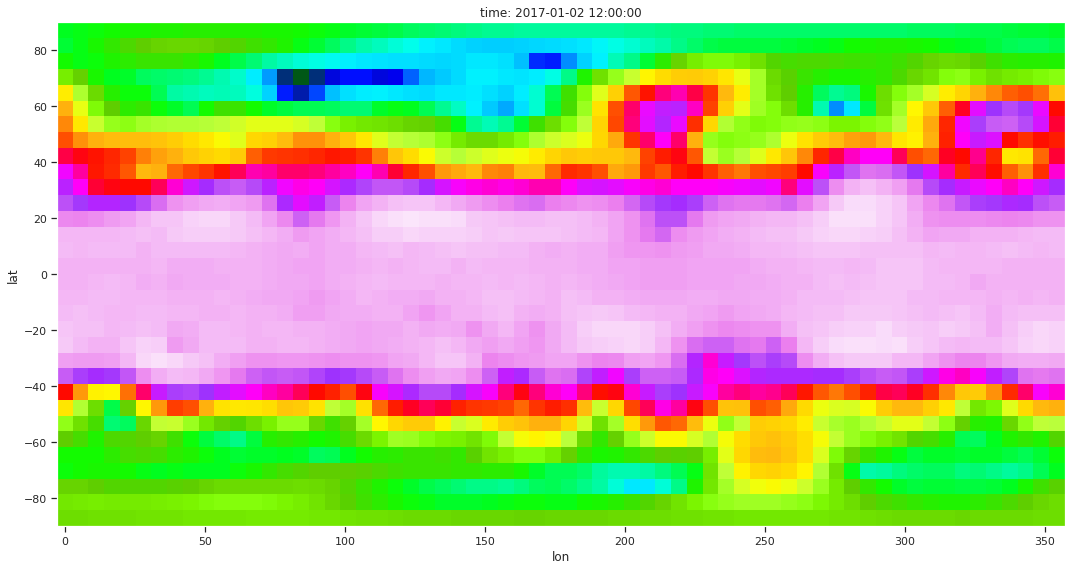
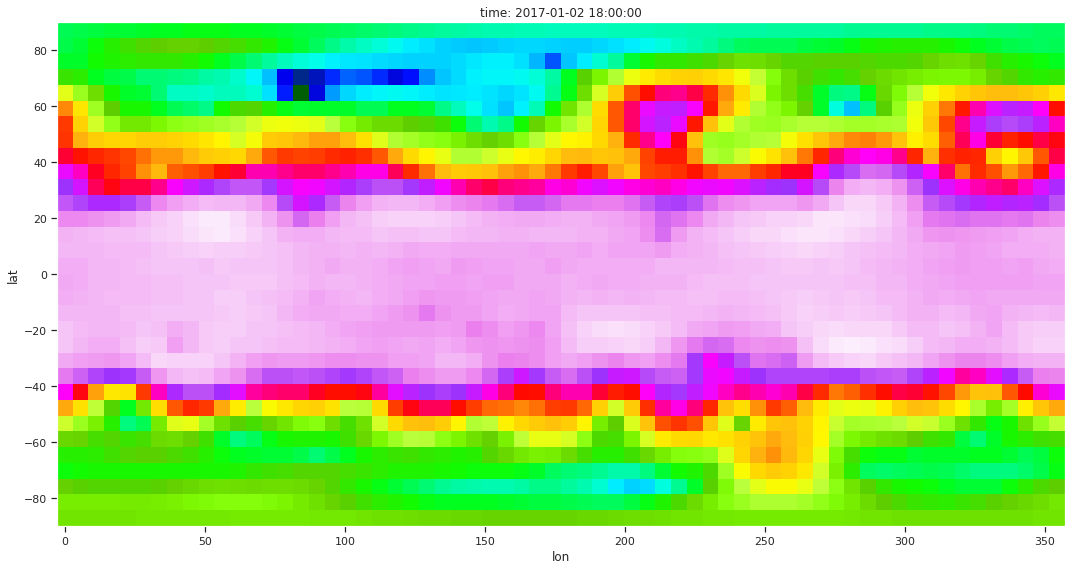
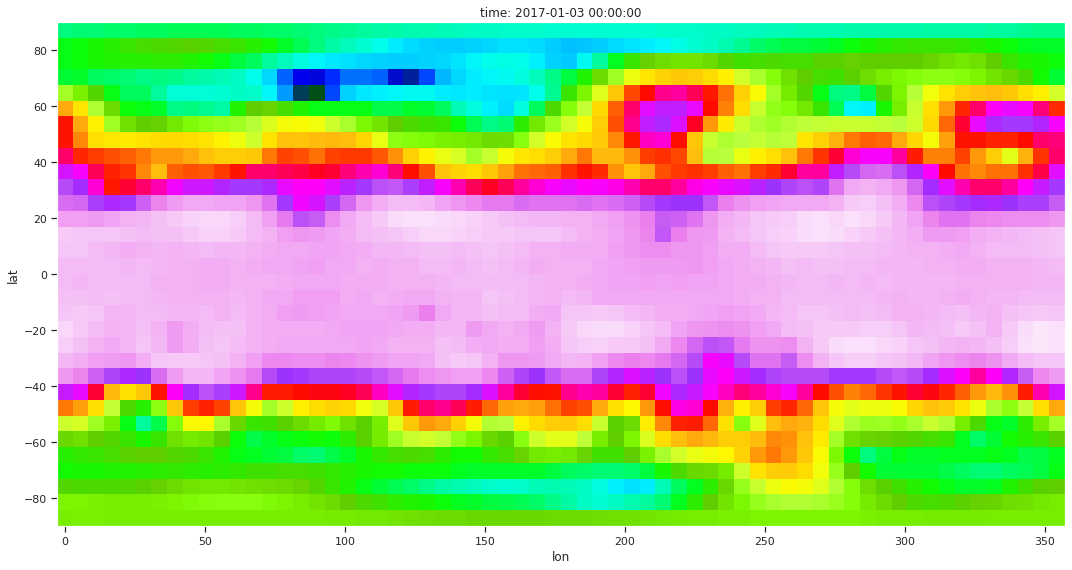
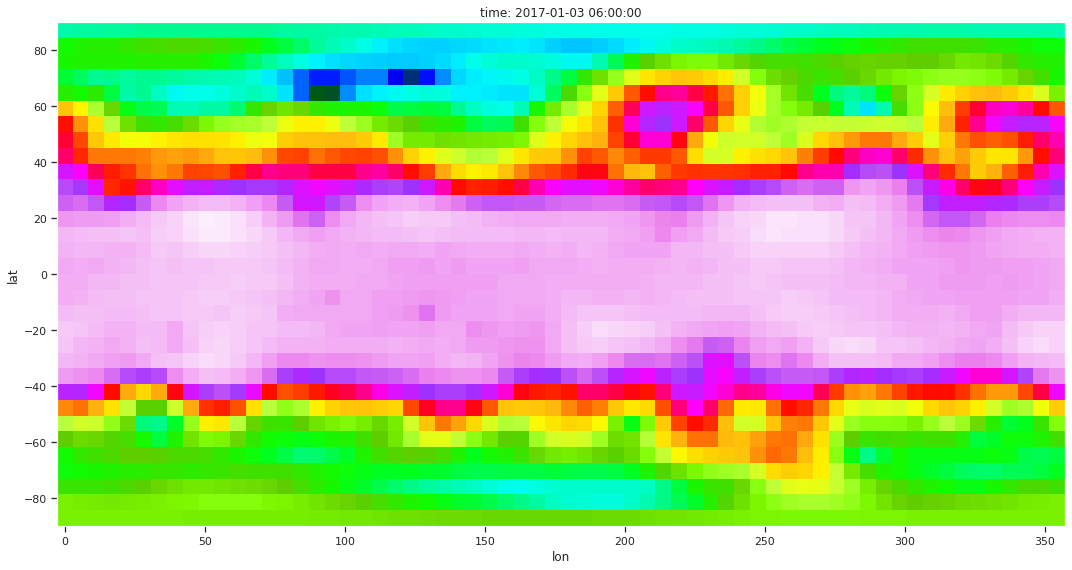
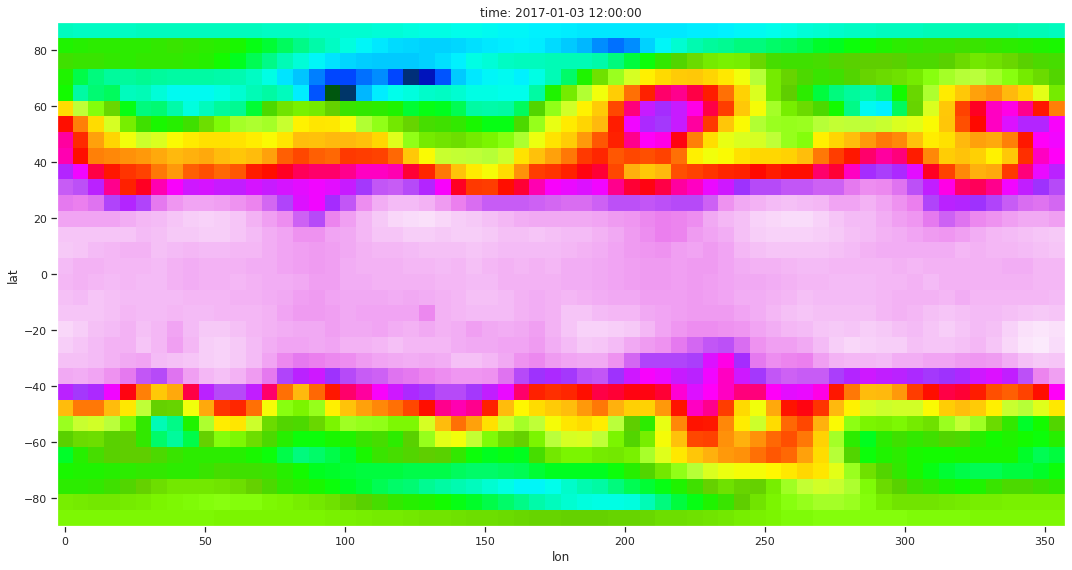
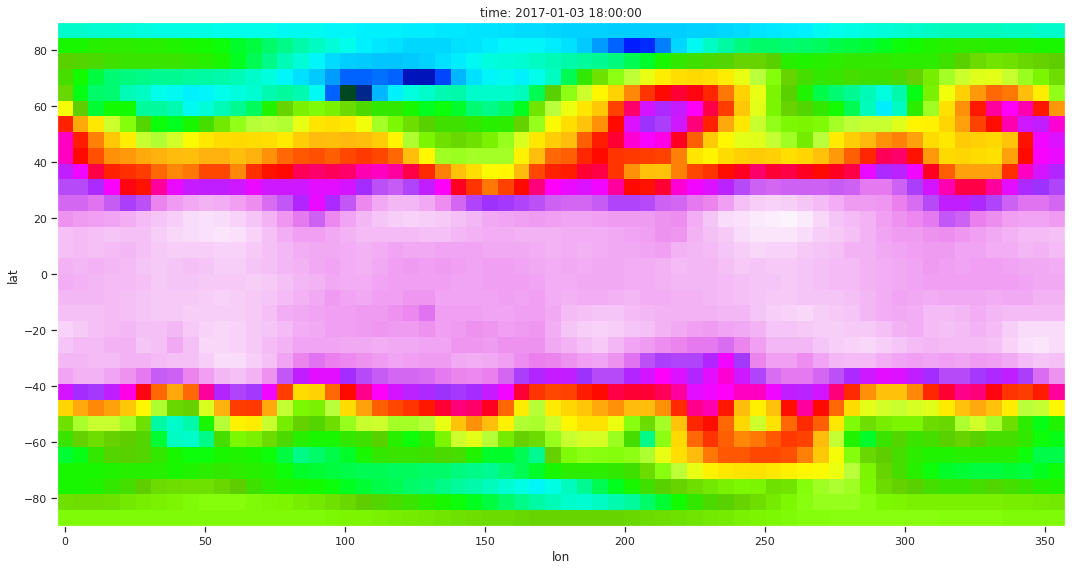
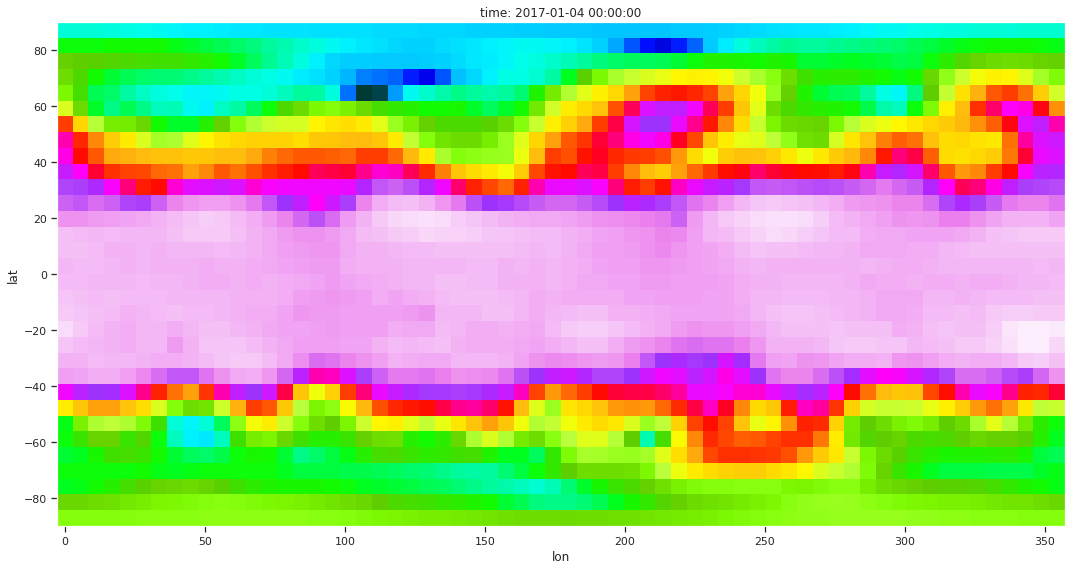
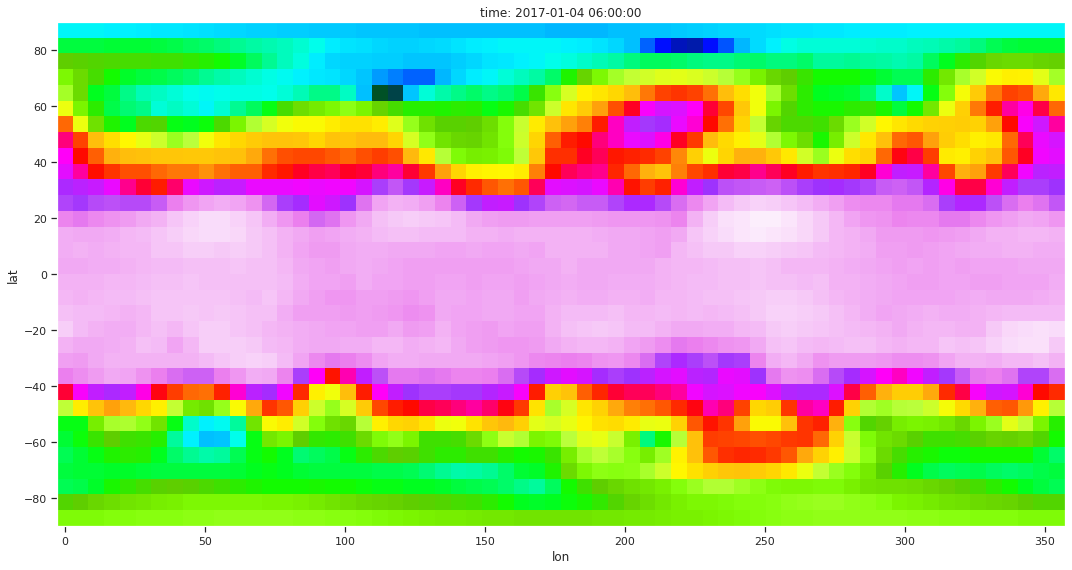
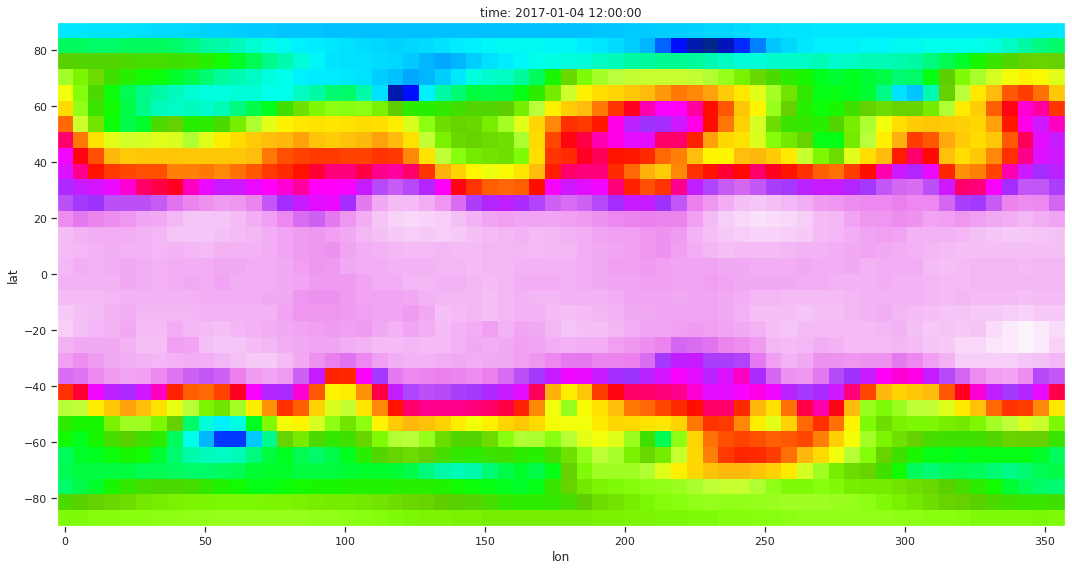
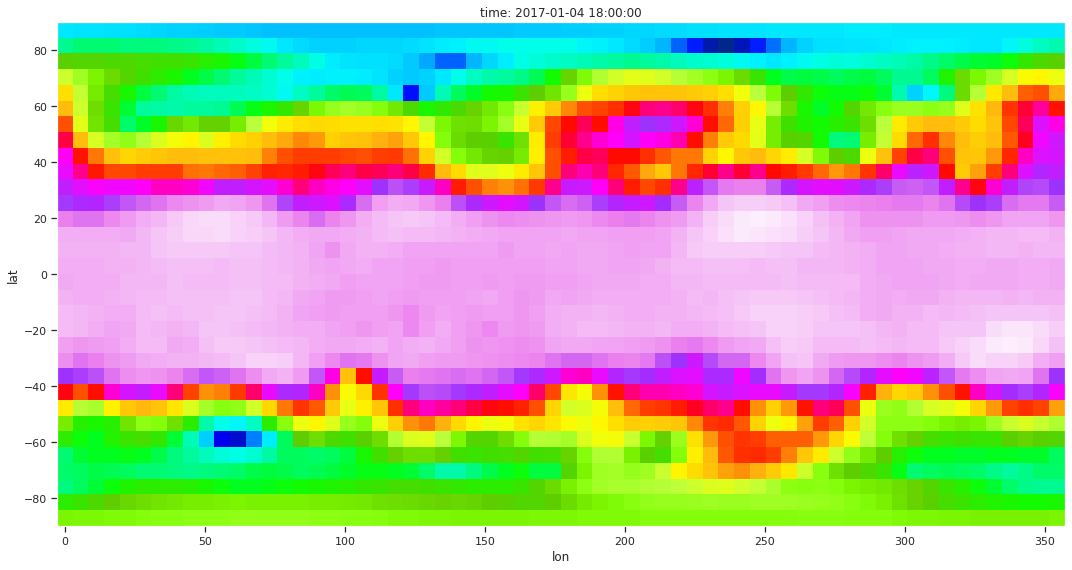
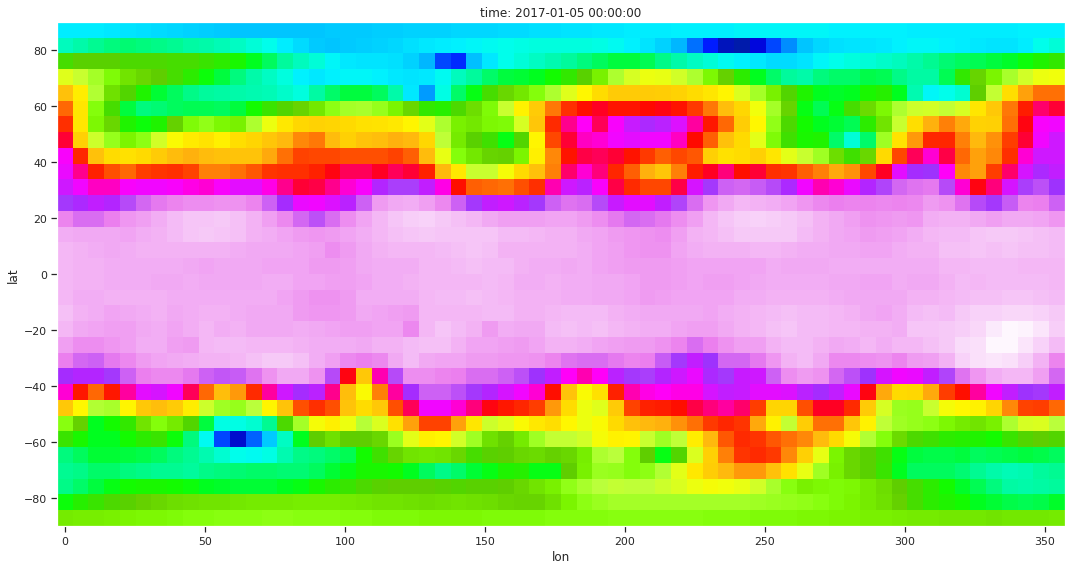
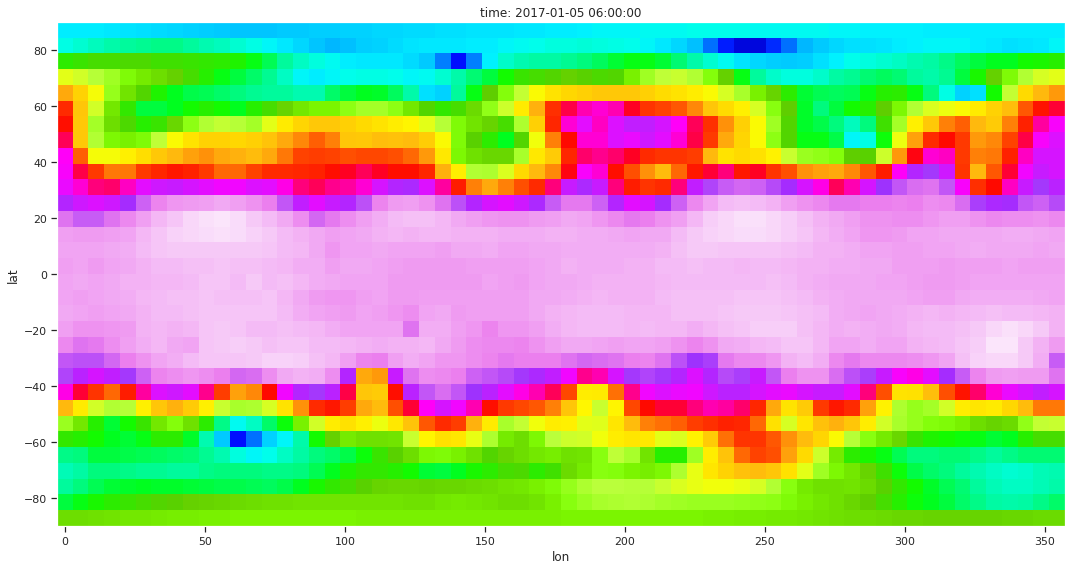
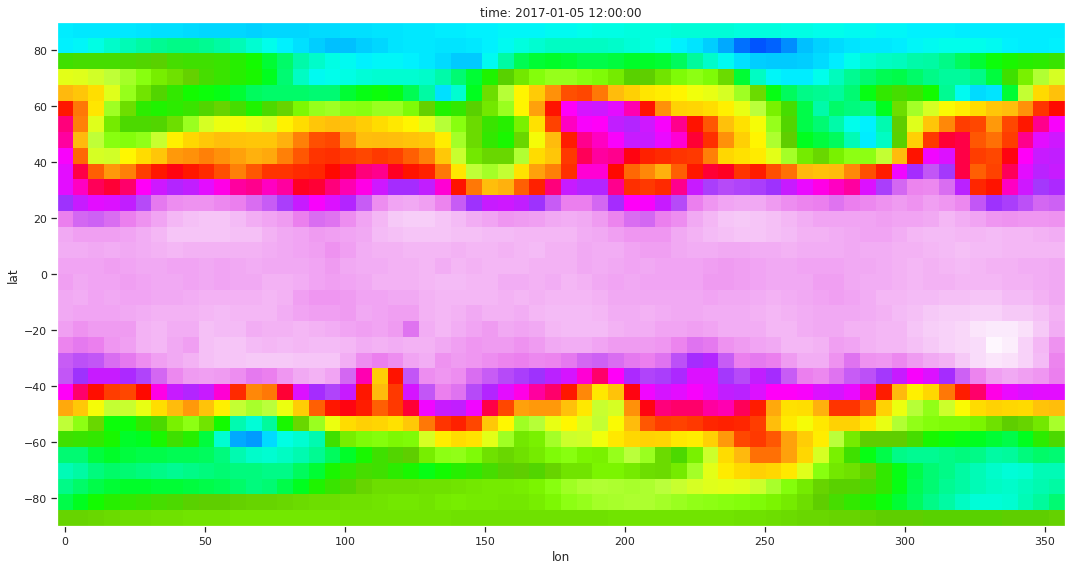
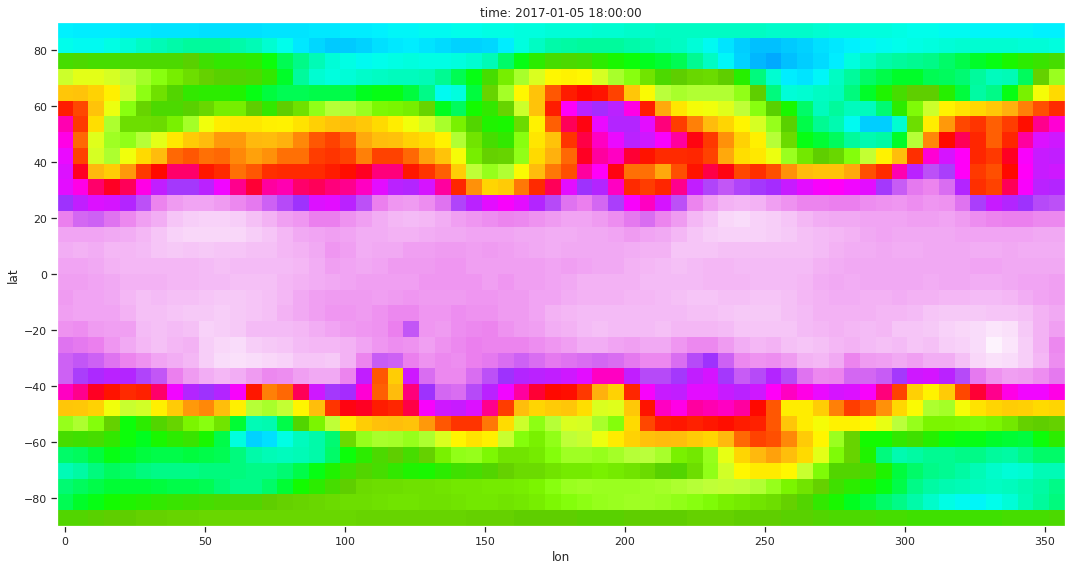
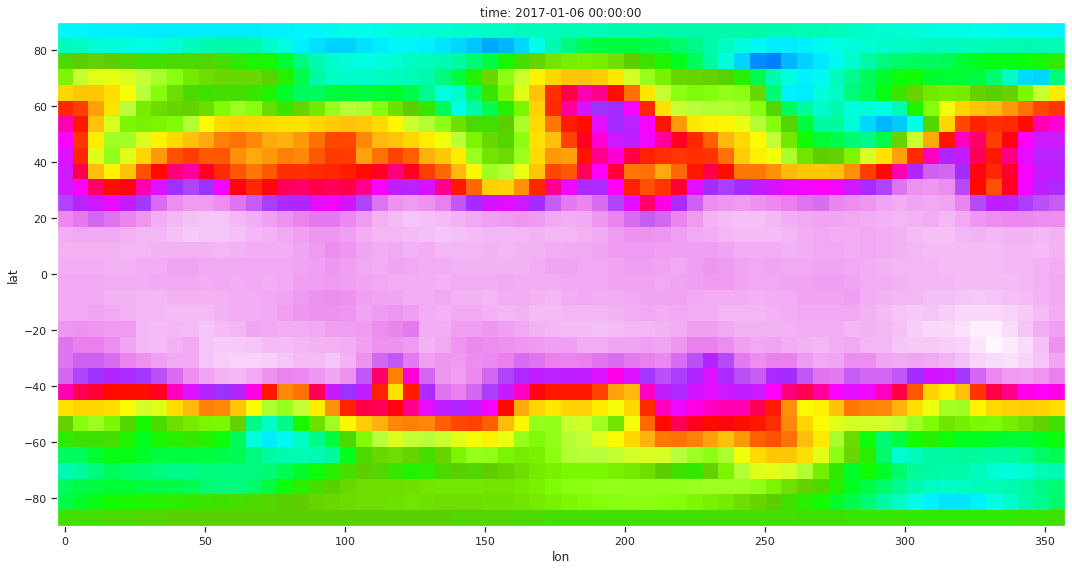

In [31]:
%%output holomap='scrubber'
img

In [36]:
ds = hv.Dataset(fc_lr_6h_iter.isel(time=0))
img = ds.to(hv.Image, ['lon', 'lat']).options(cmap='gist_ncar', fig_size=500)

:HoloMap   [lead_time]
   :Image   [lon,lat]   (__xarray_dataarray_variable__)
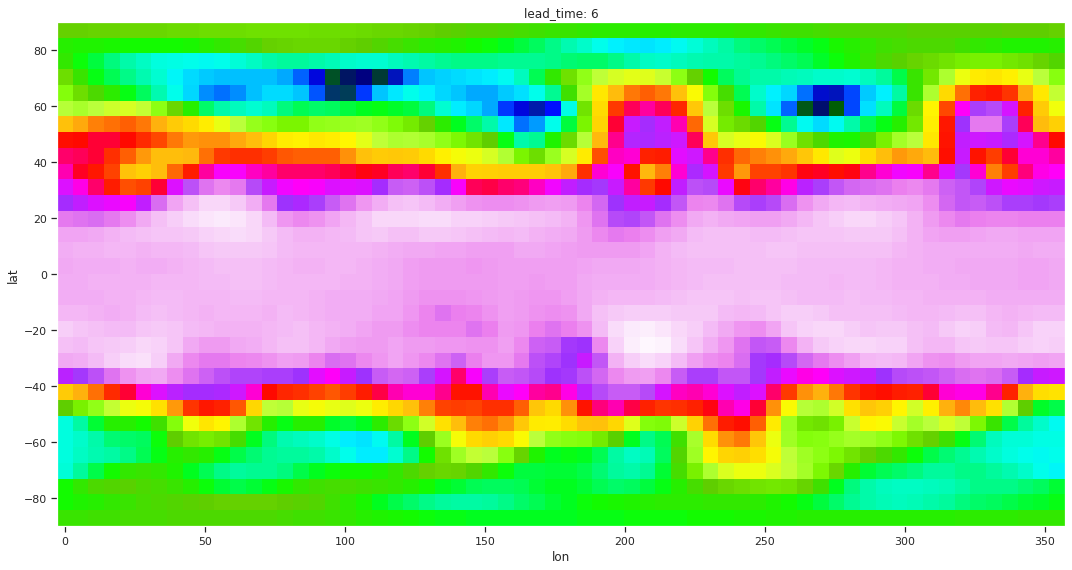
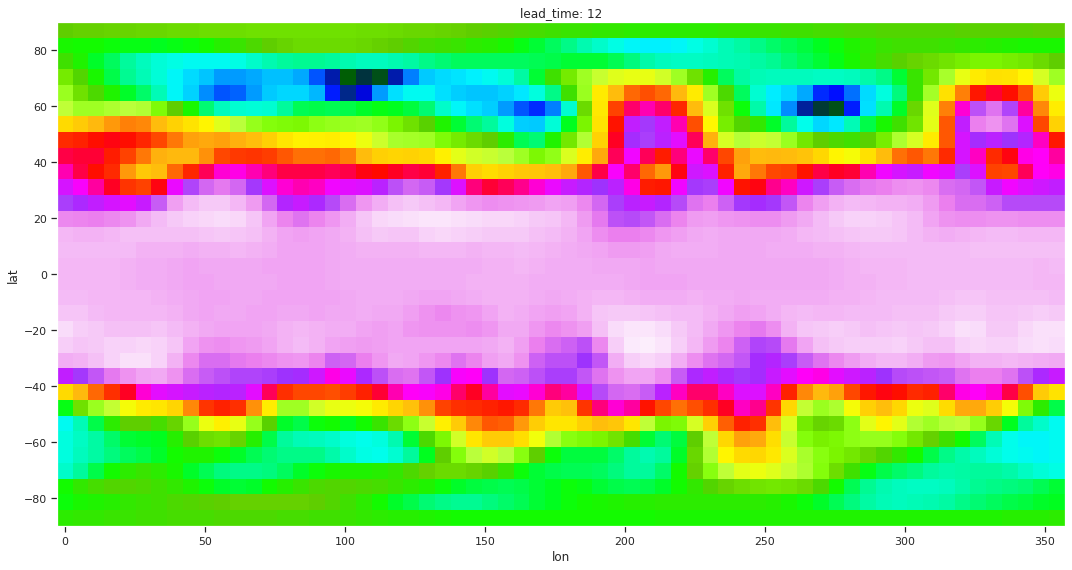
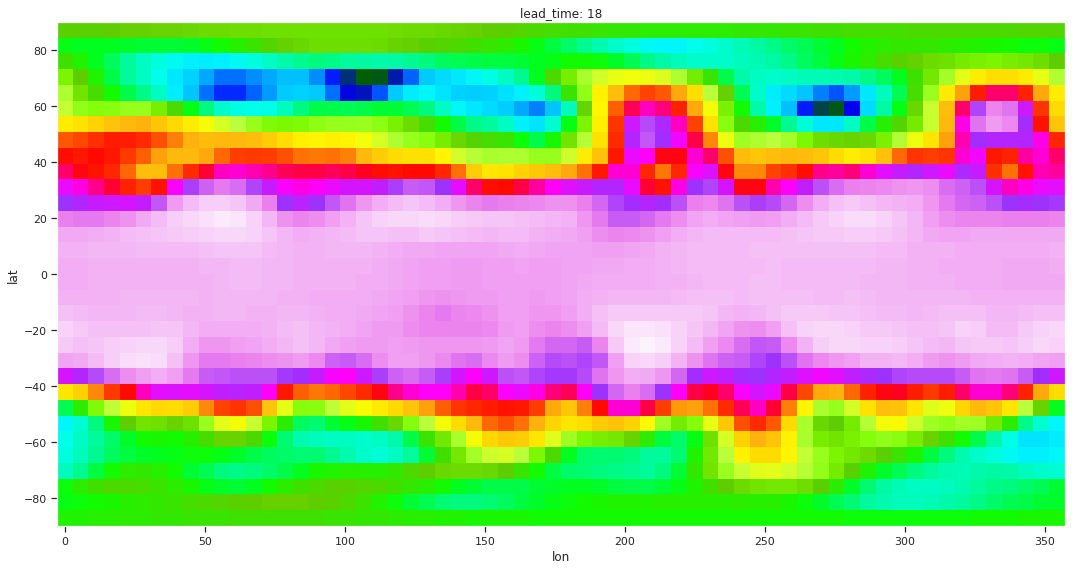
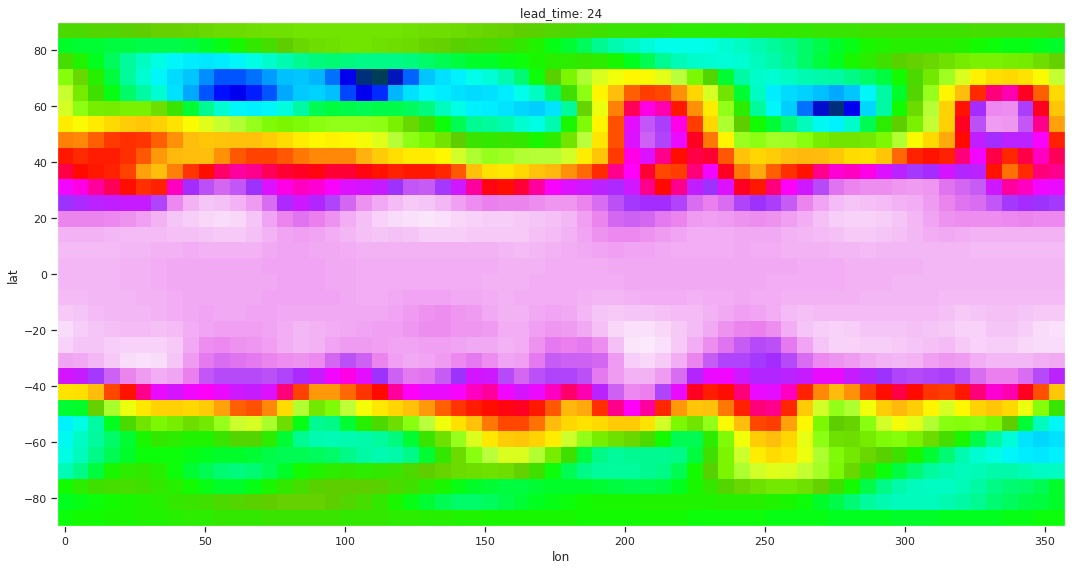
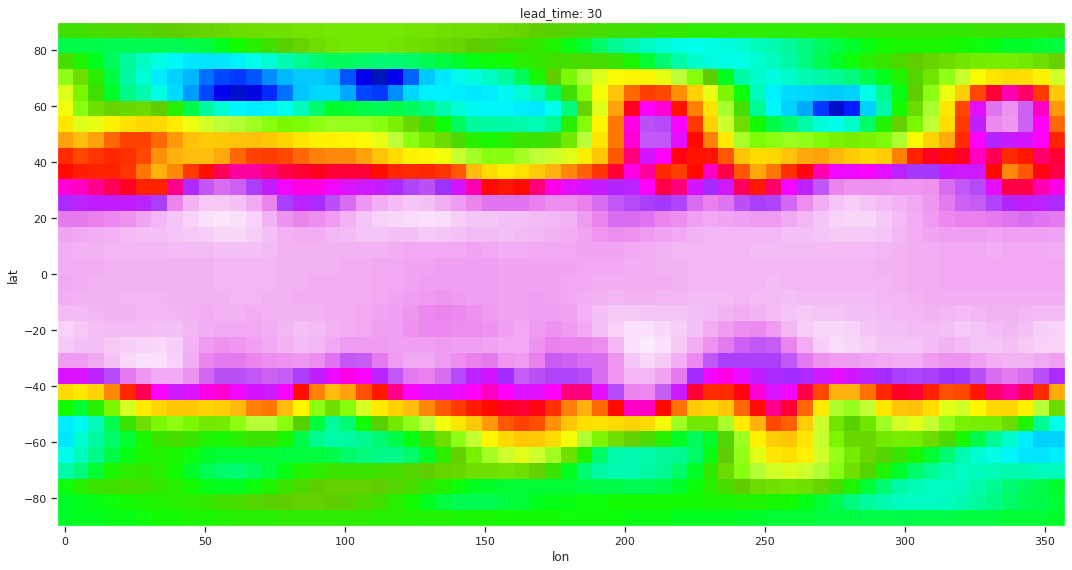
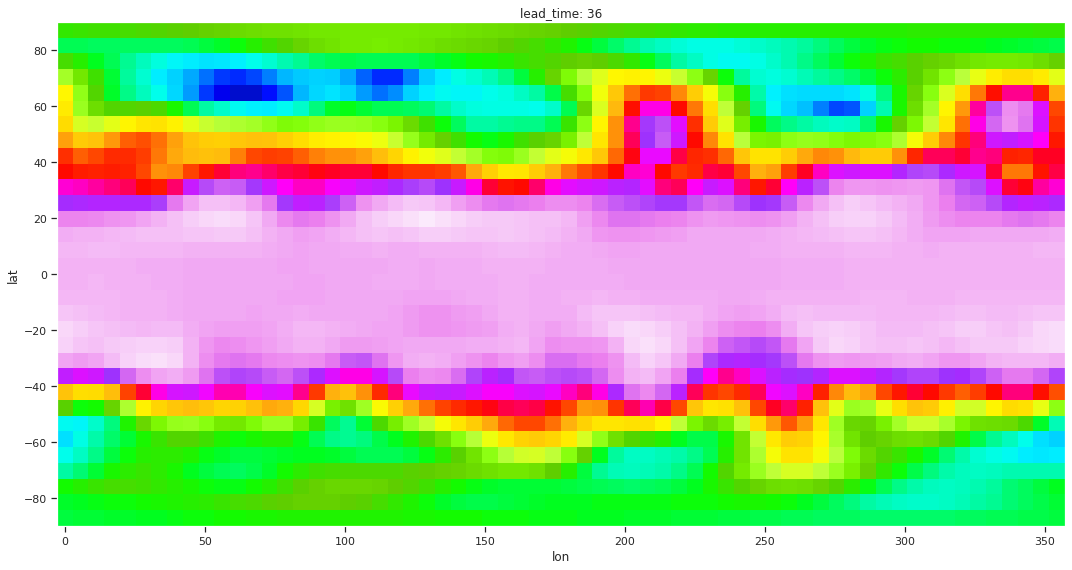
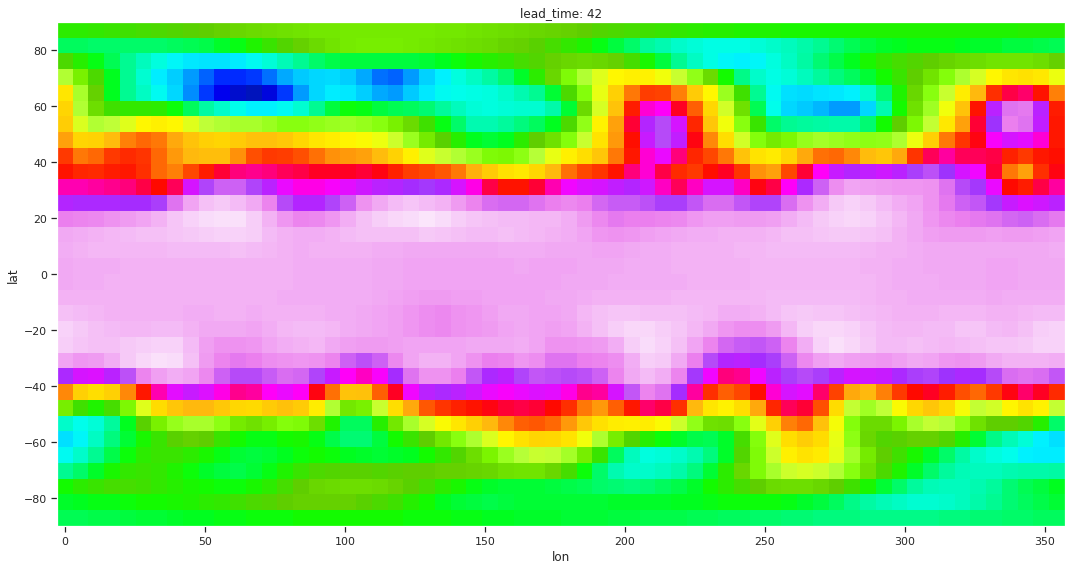
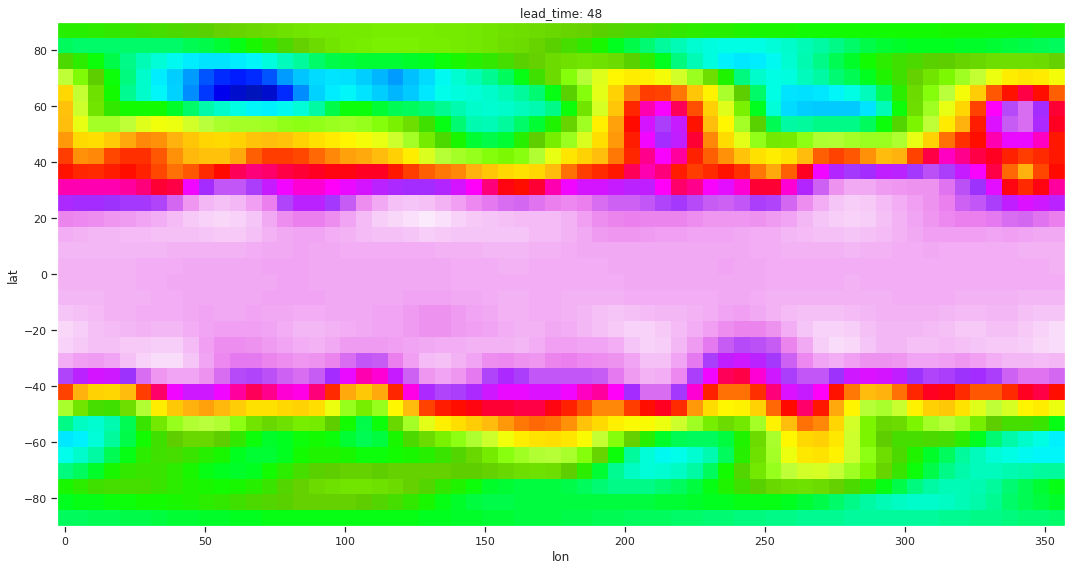
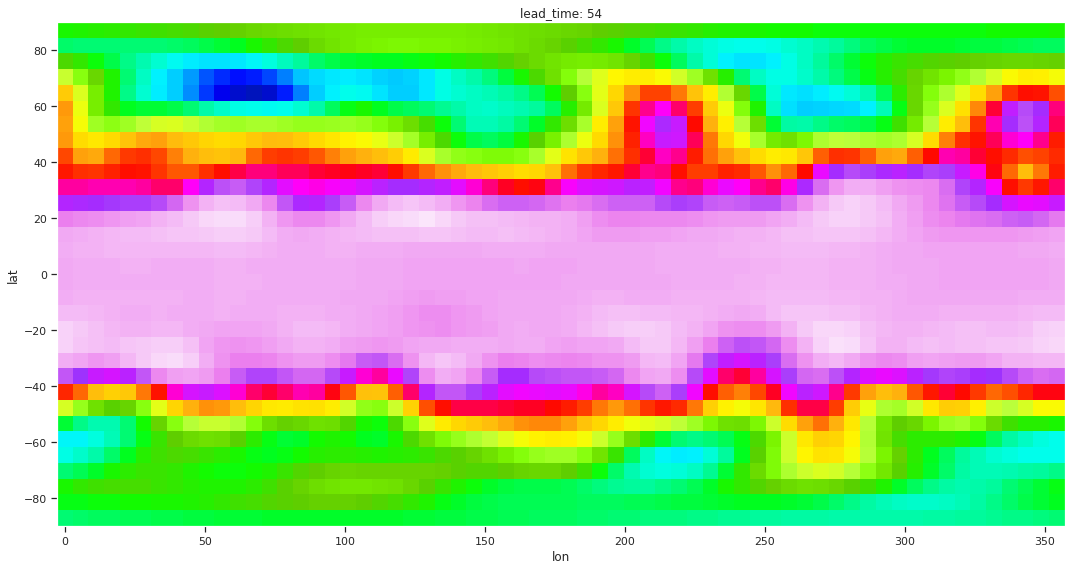
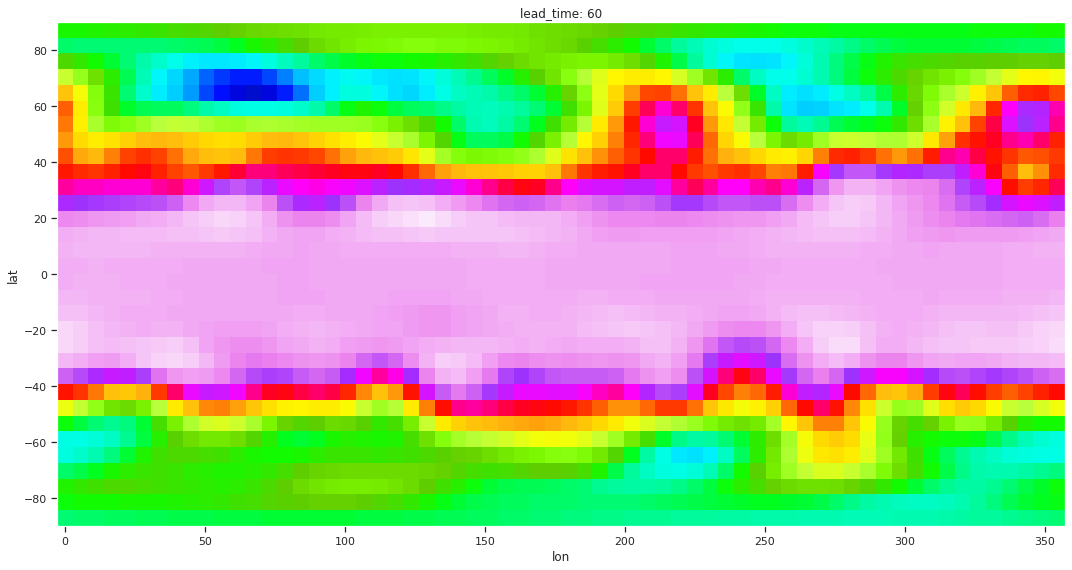
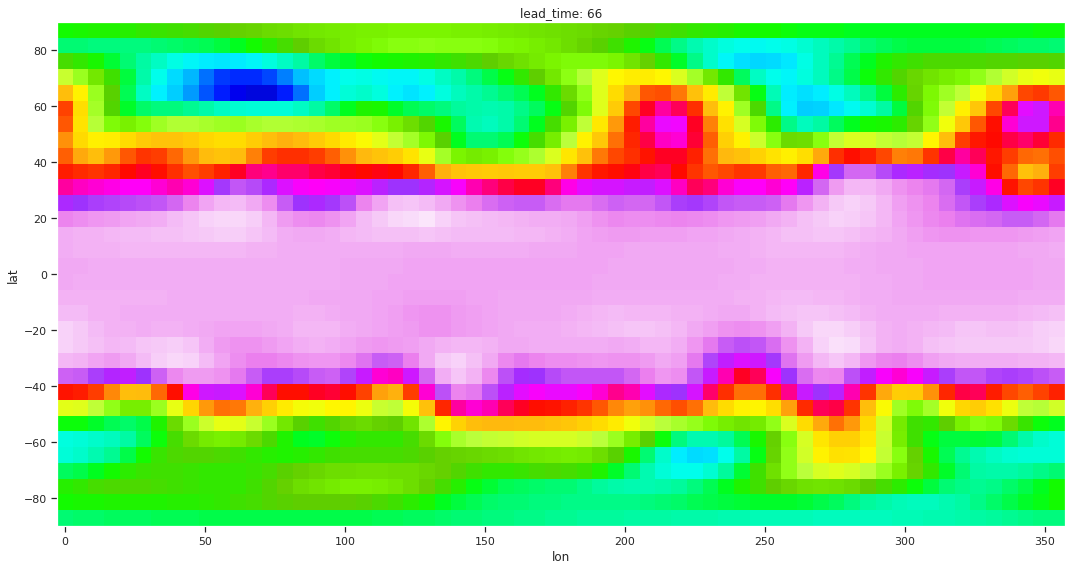
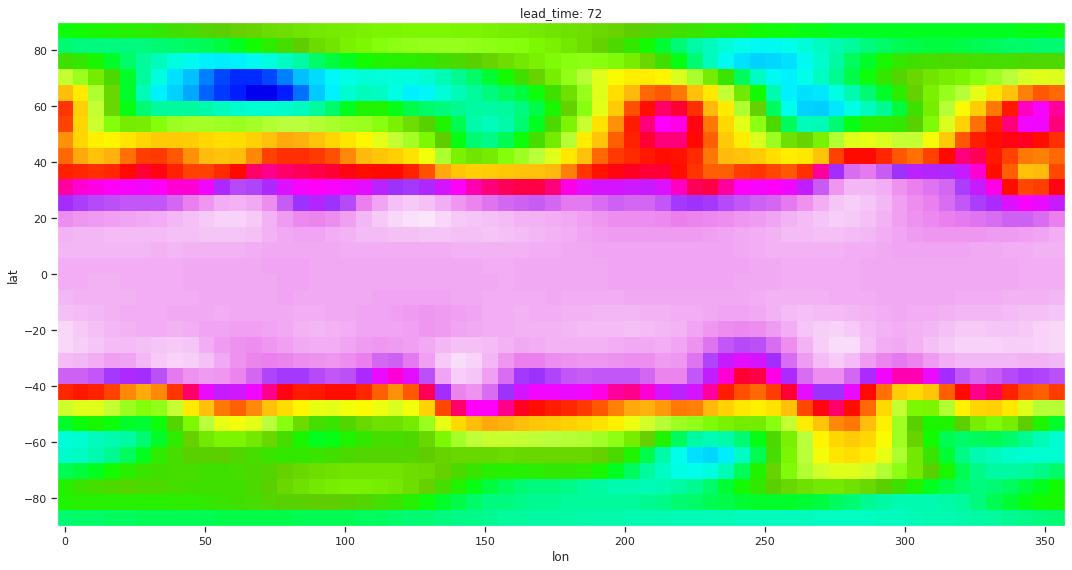
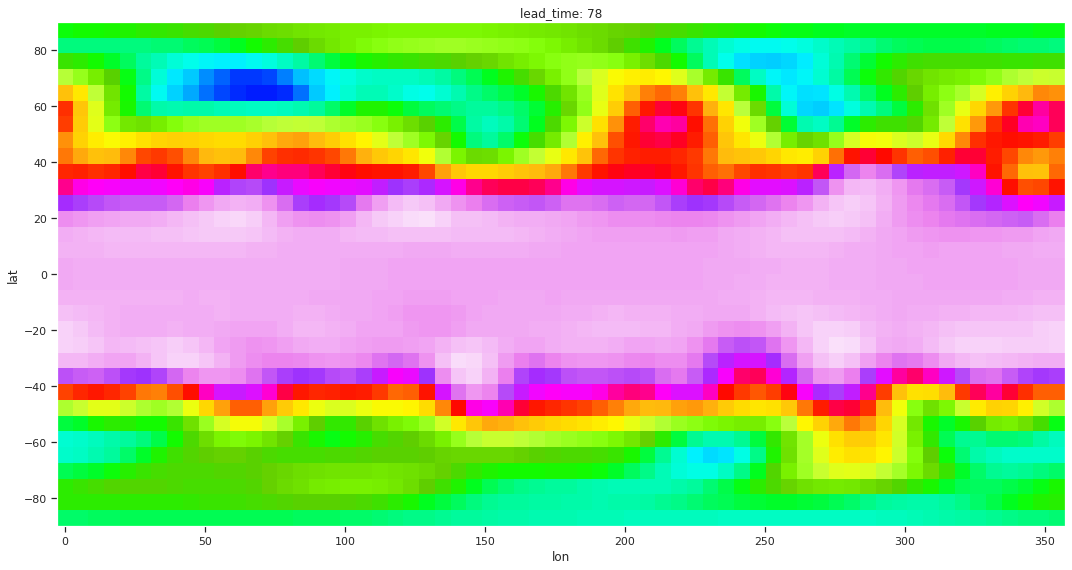
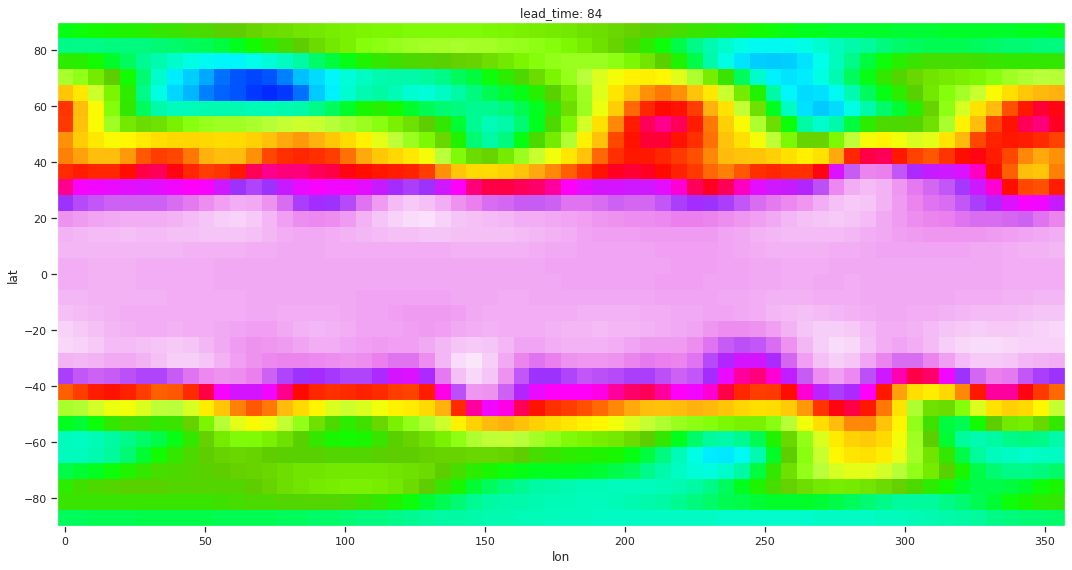
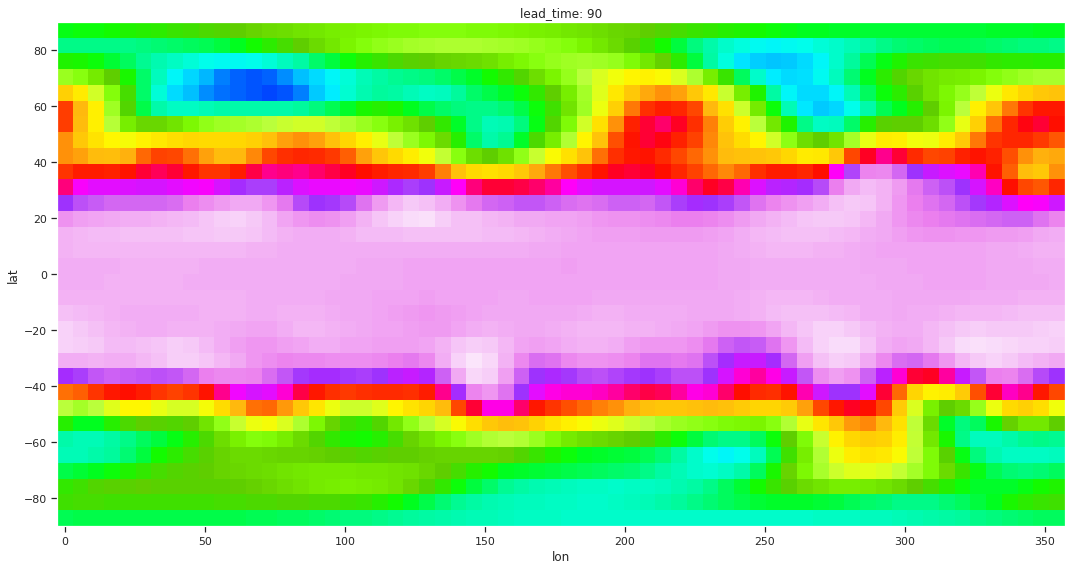
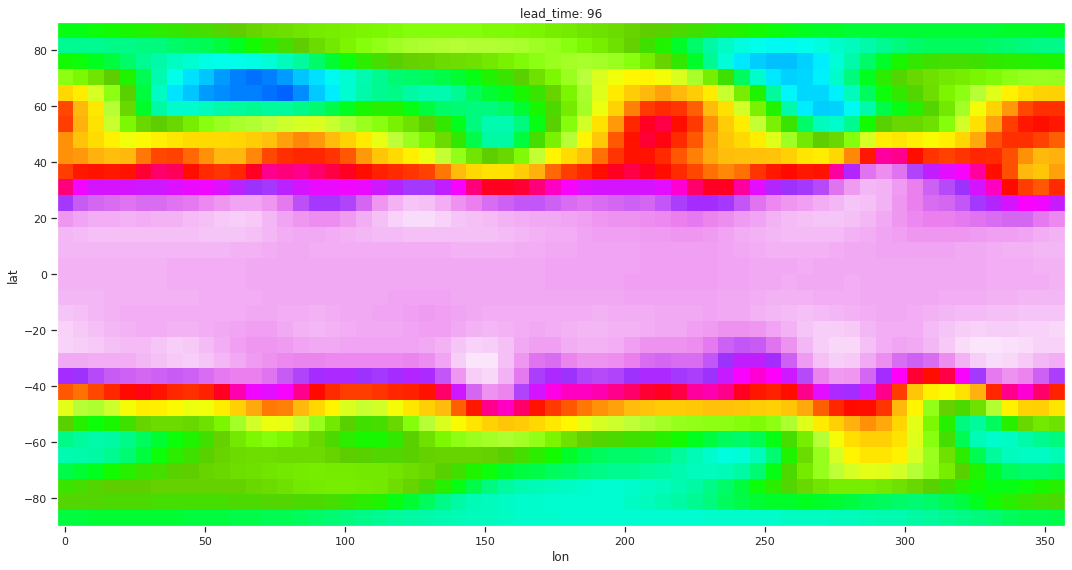
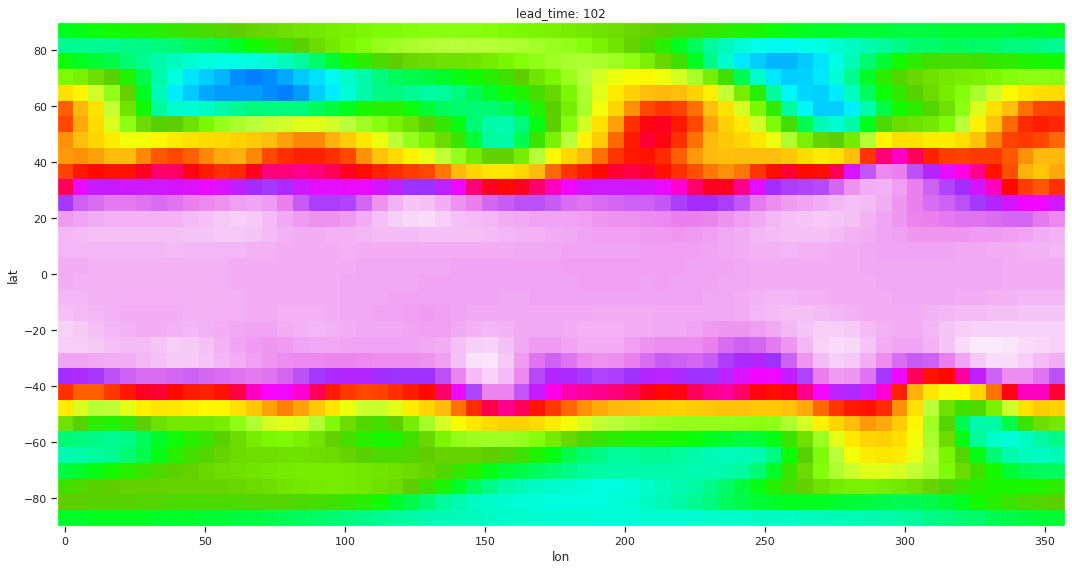
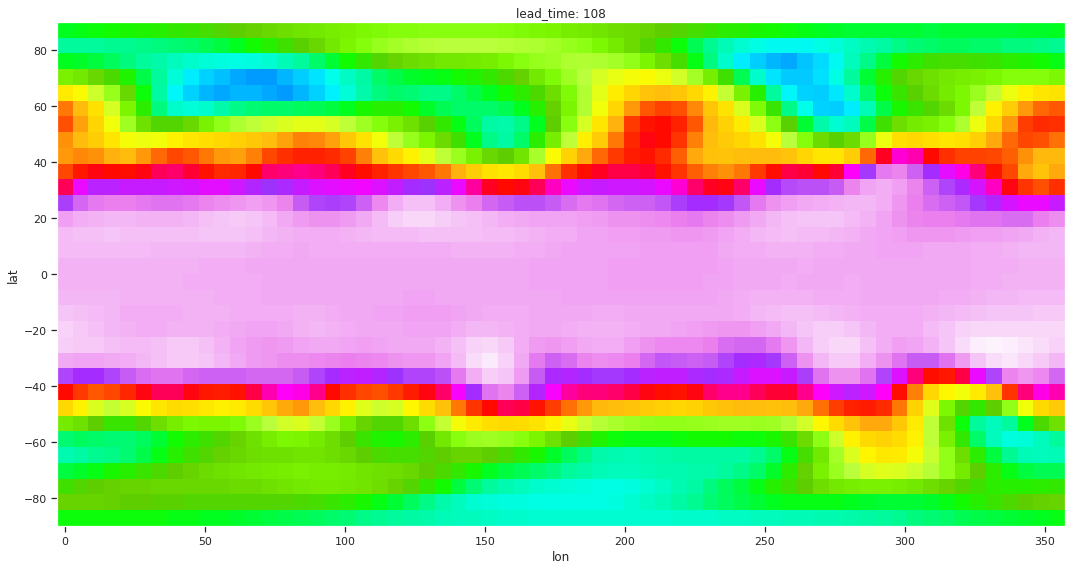
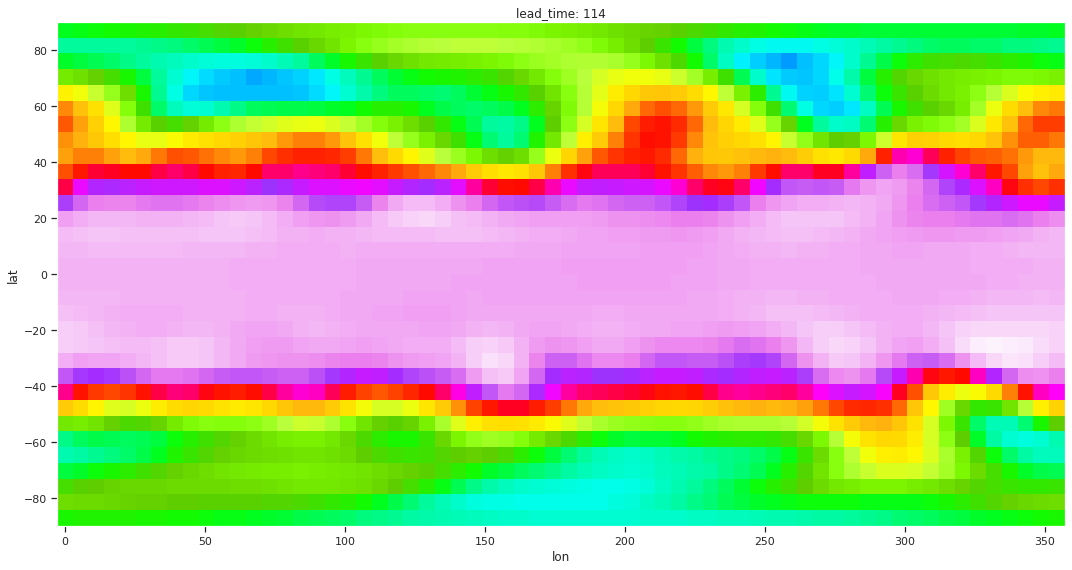
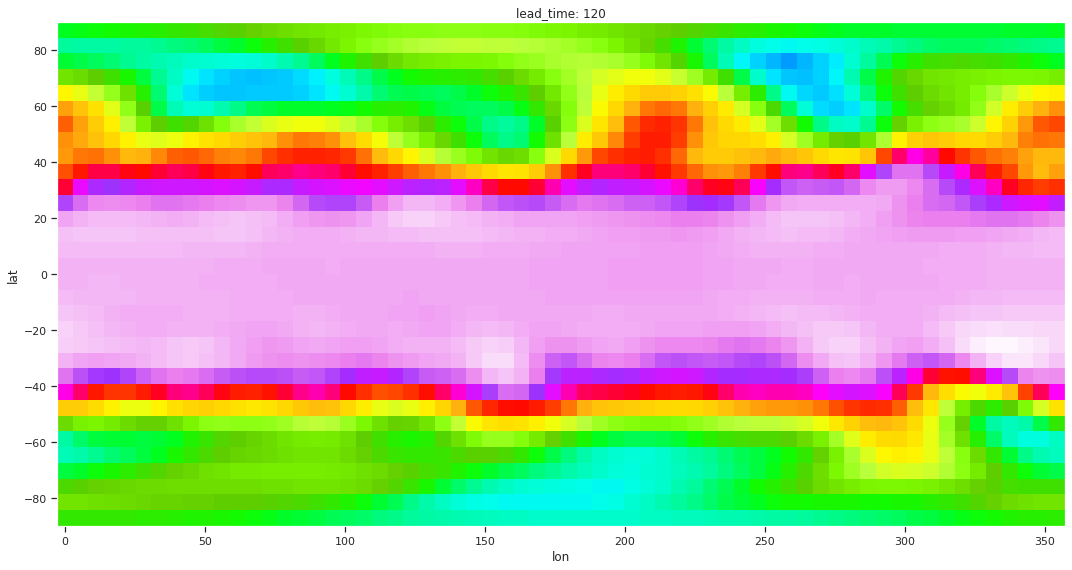

In [37]:
%%output holomap='scrubber'
img

In [38]:
ds = hv.Dataset(fc_cnn_6h_iter.isel(time=0))
img = ds.to(hv.Image, ['lon', 'lat']).options(cmap='gist_ncar', fig_size=500)

:HoloMap   [lead_time]
   :Image   [lon,lat]   (__xarray_dataarray_variable__)
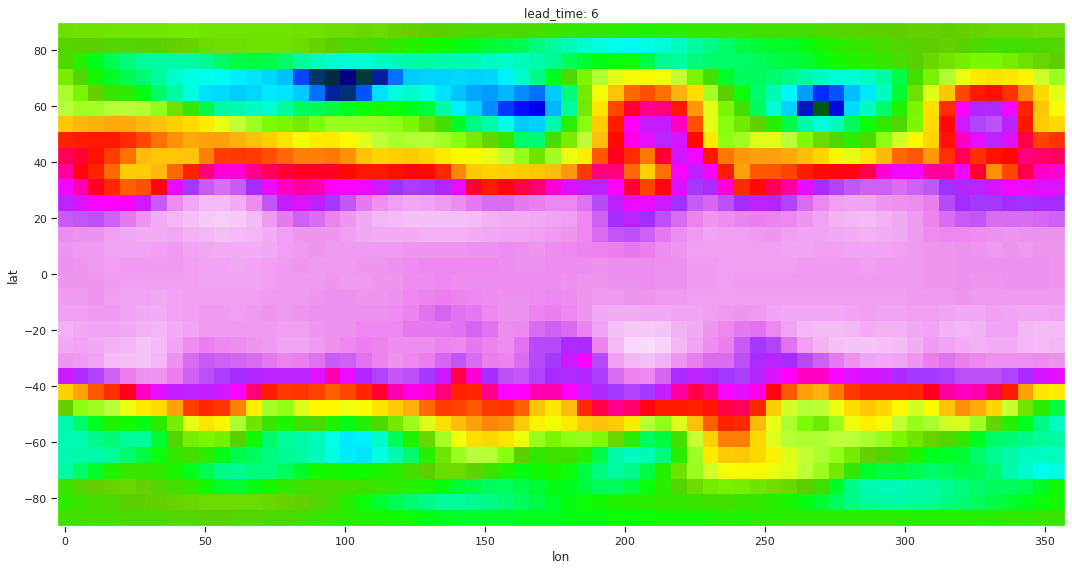
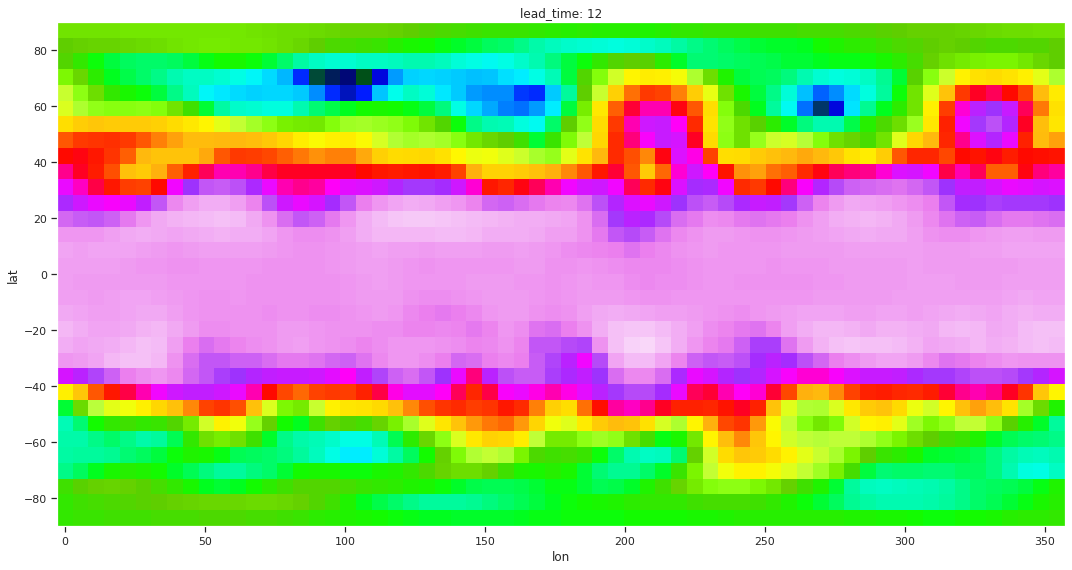
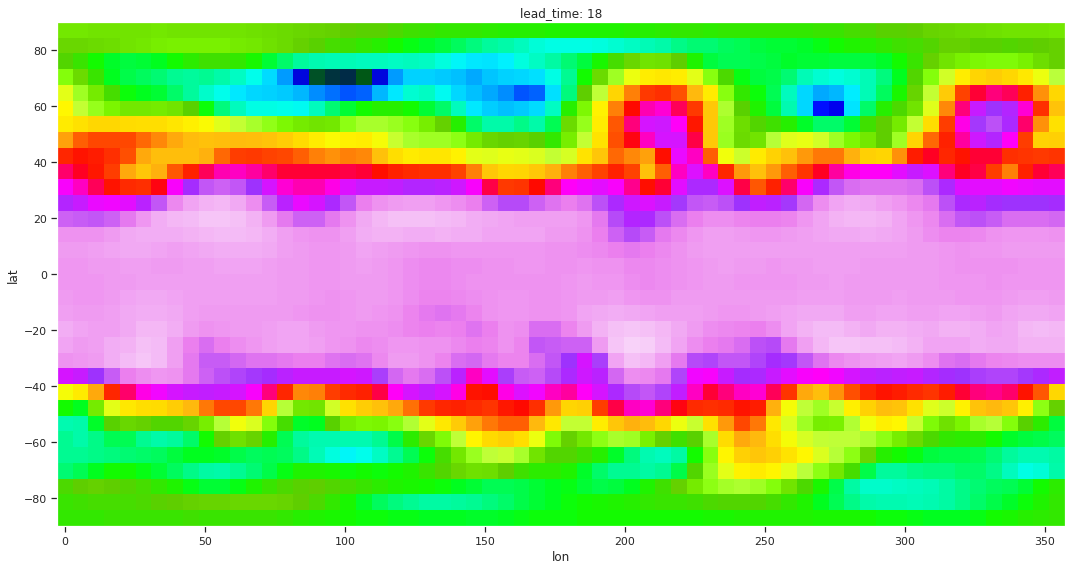
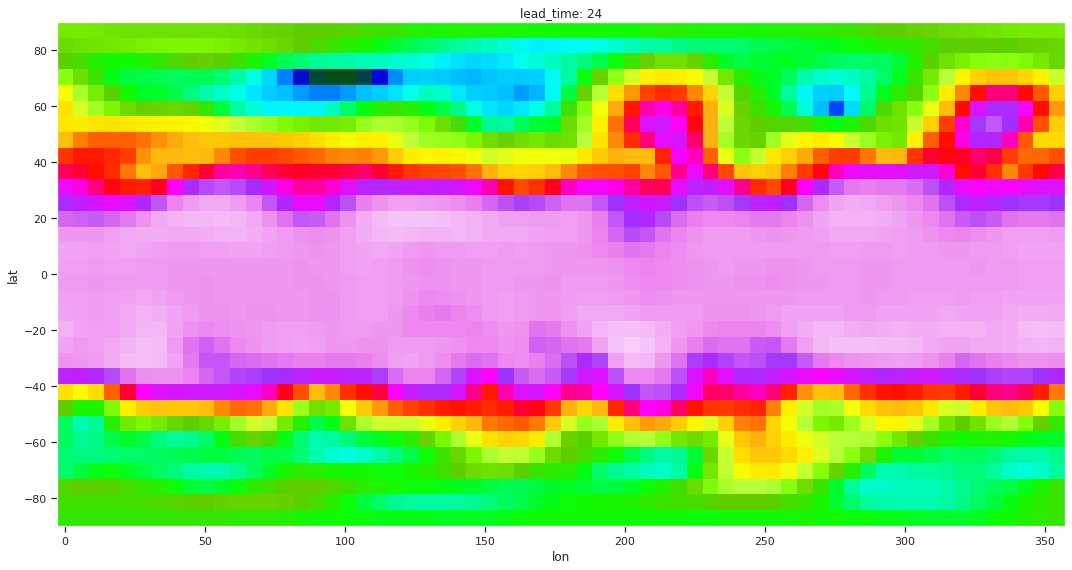
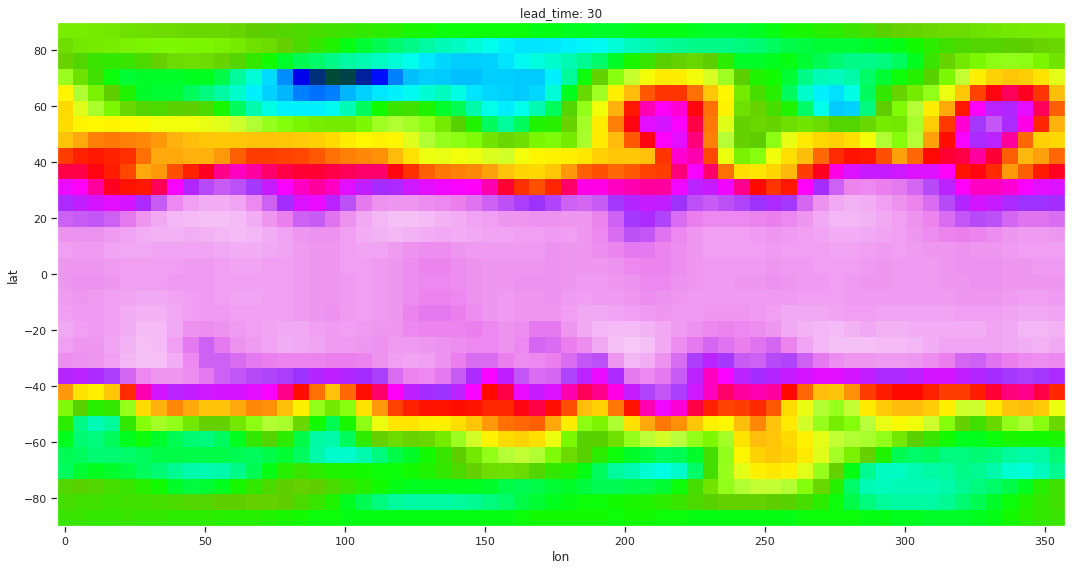
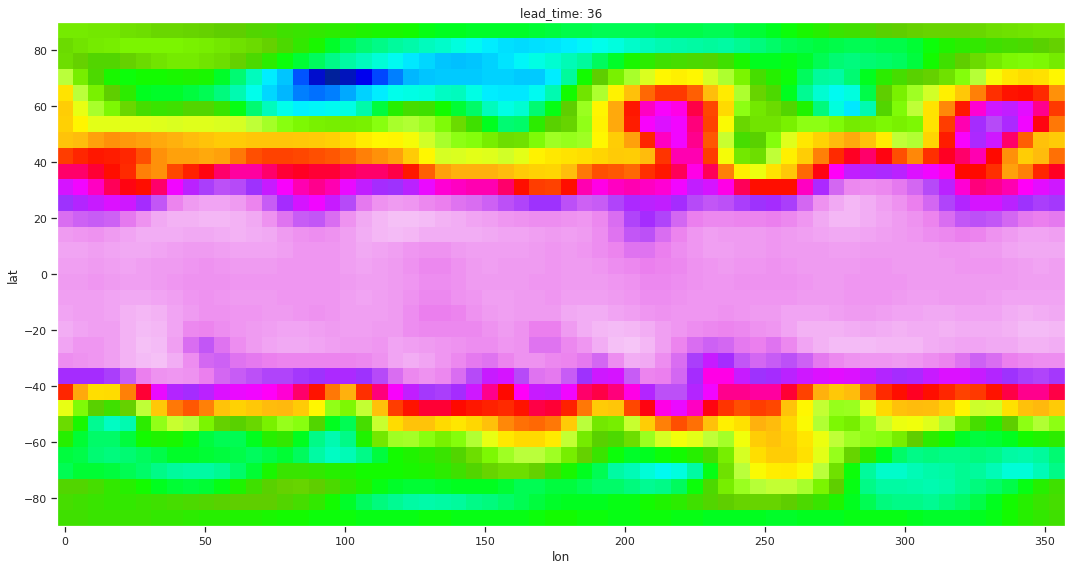
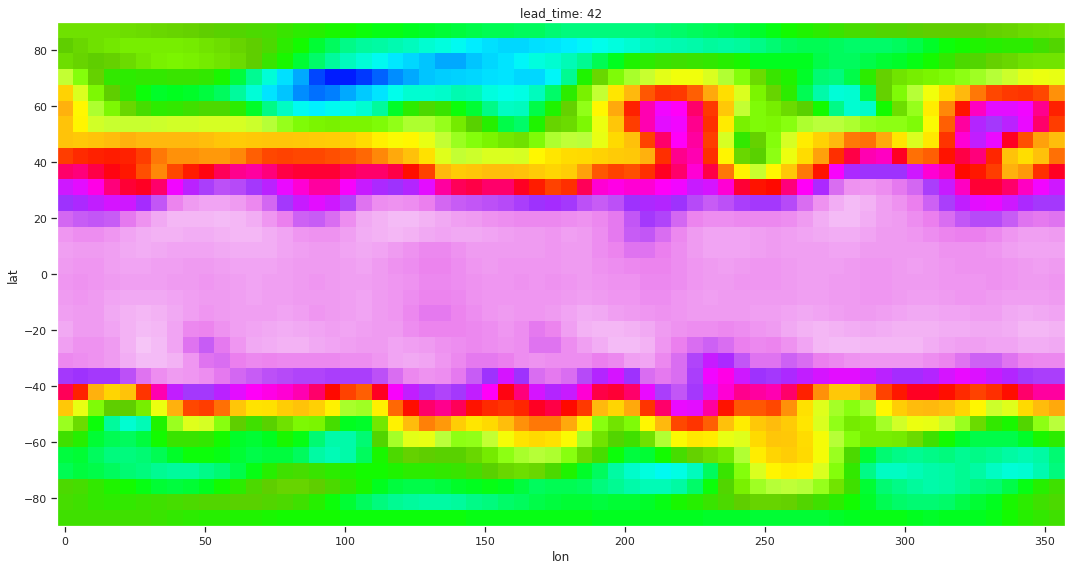
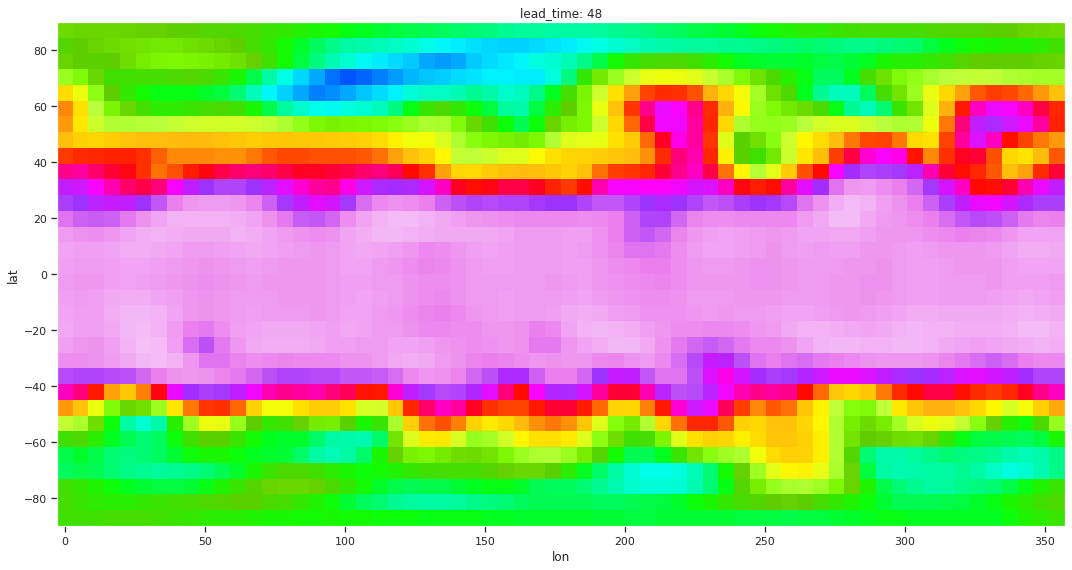
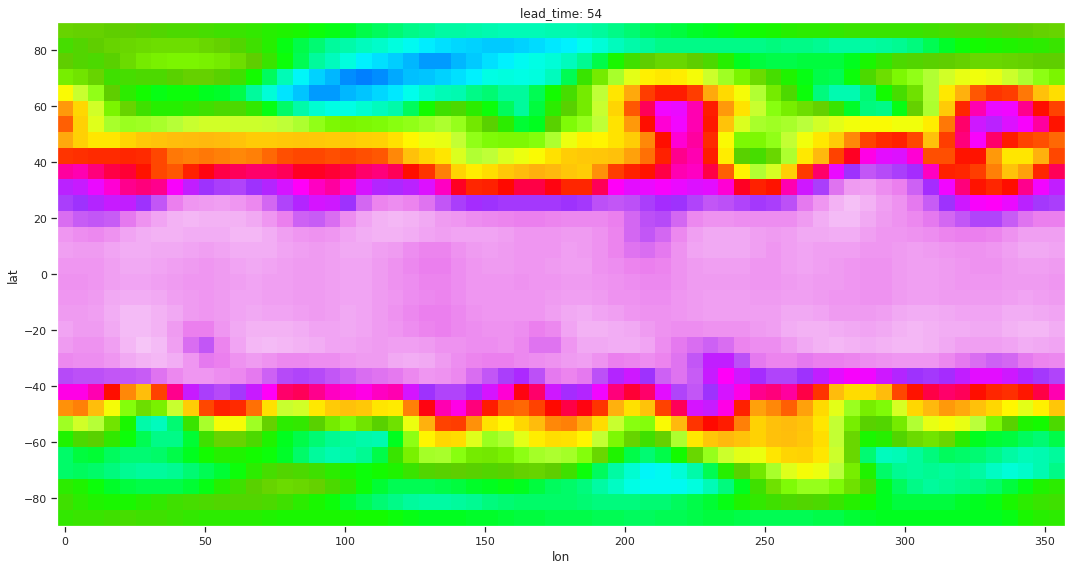
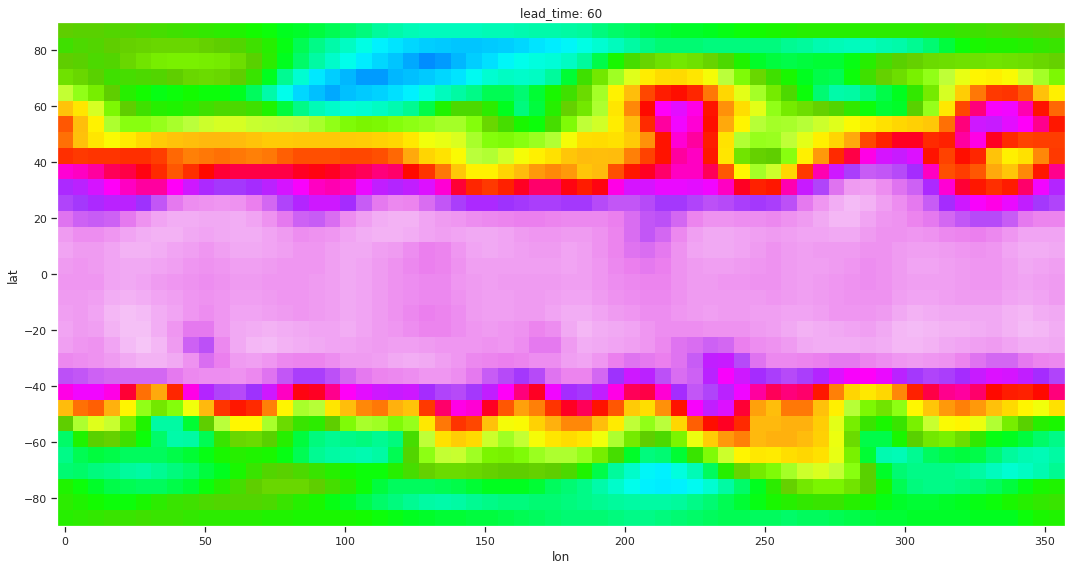
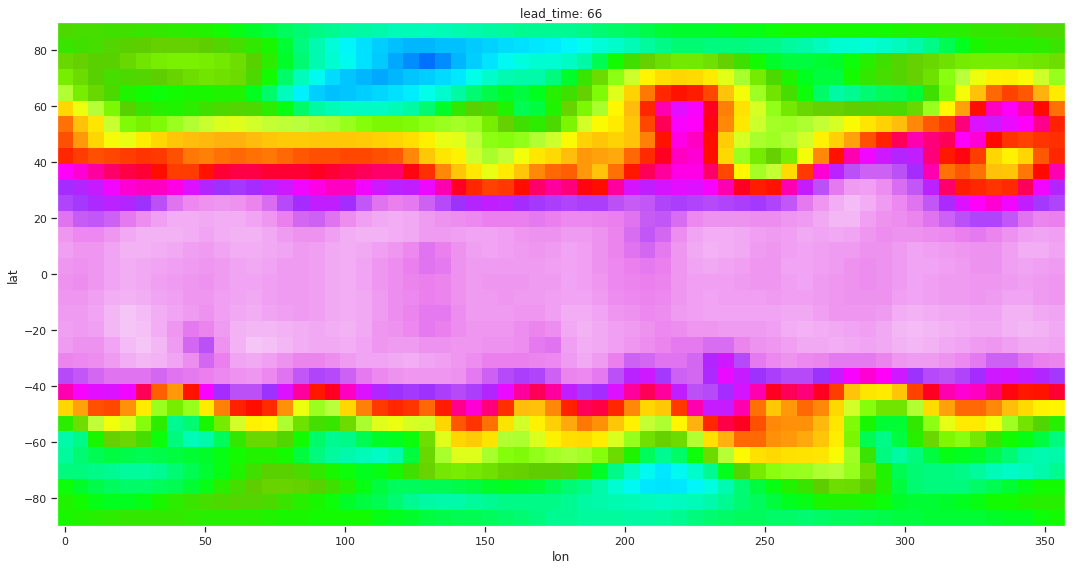
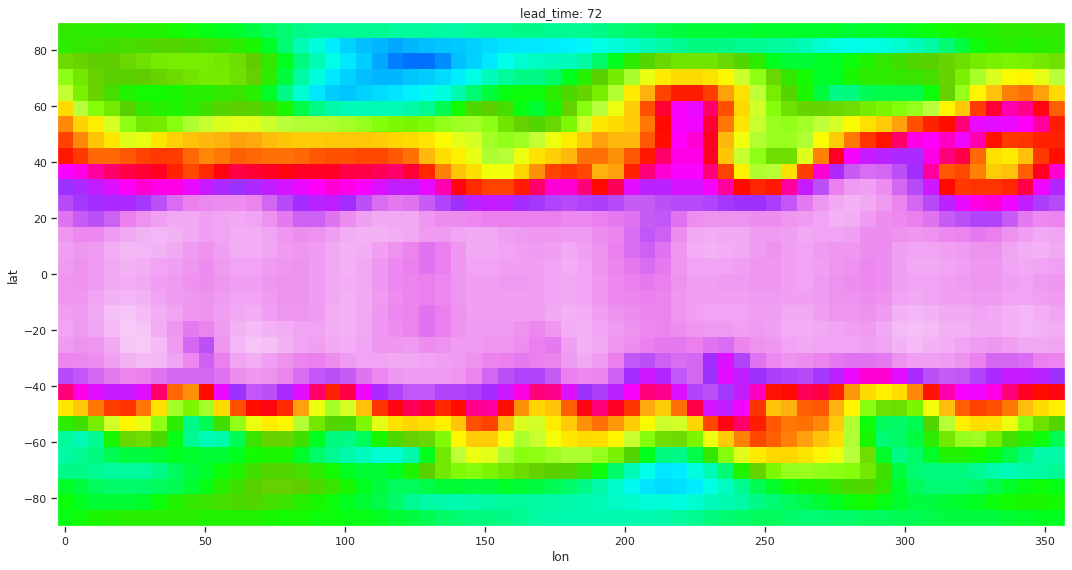
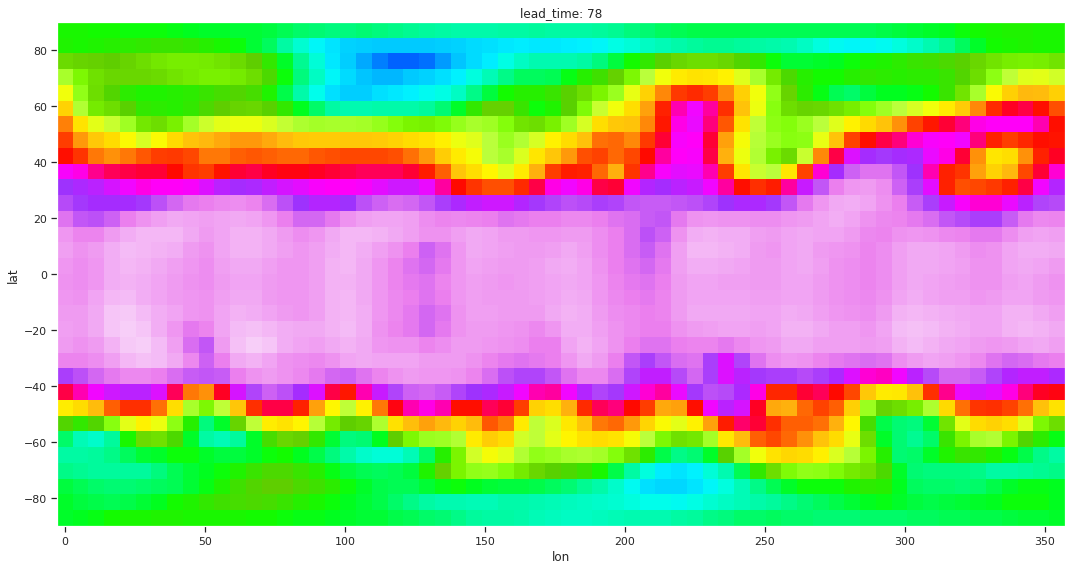
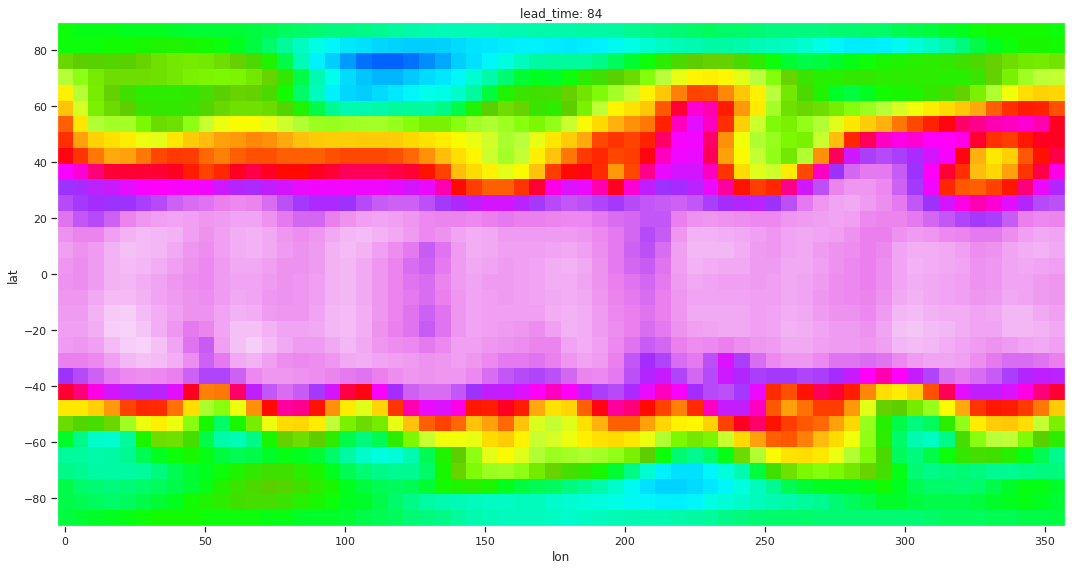
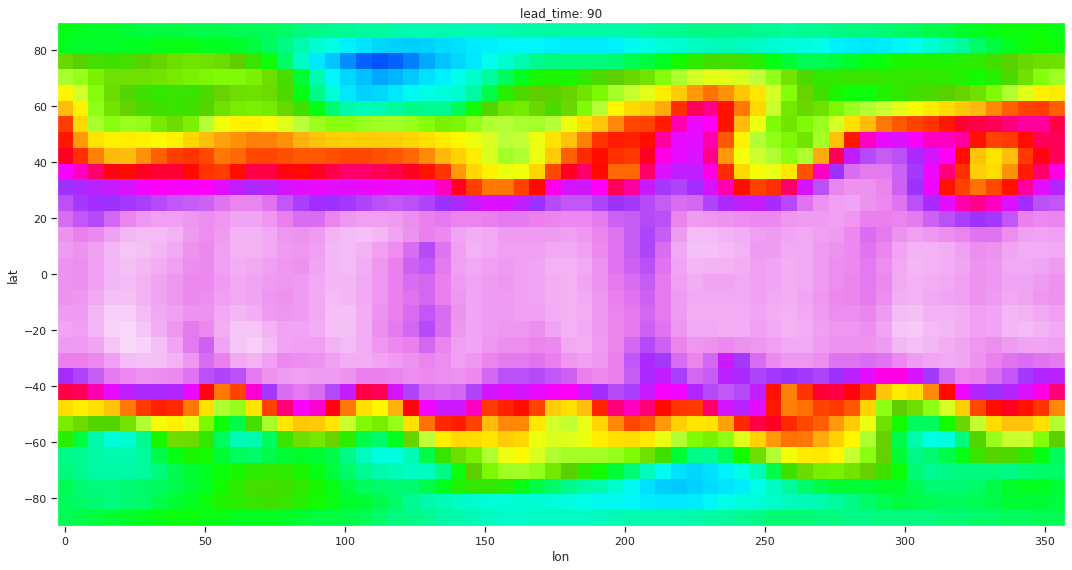
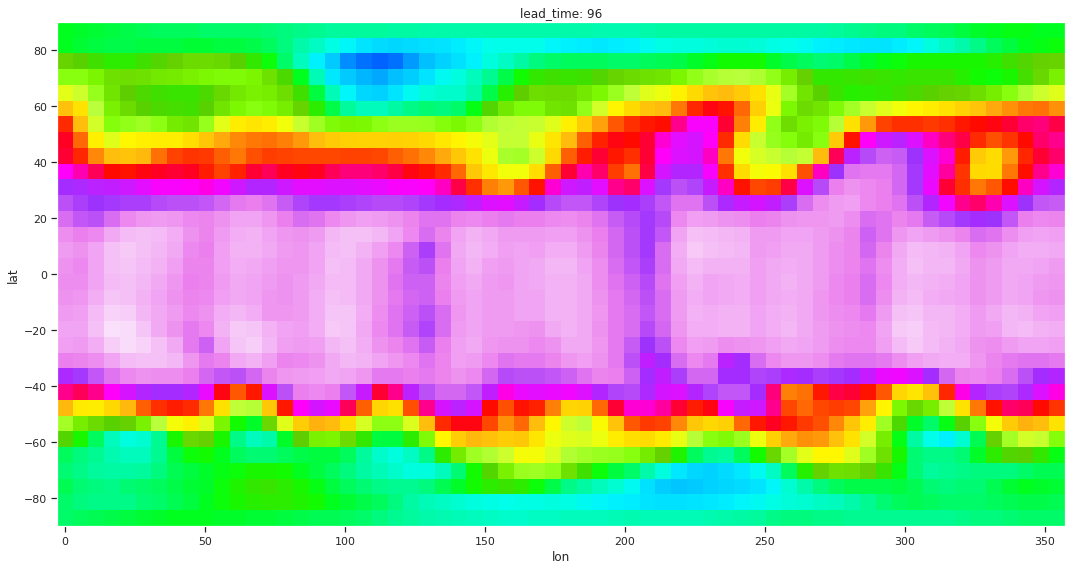
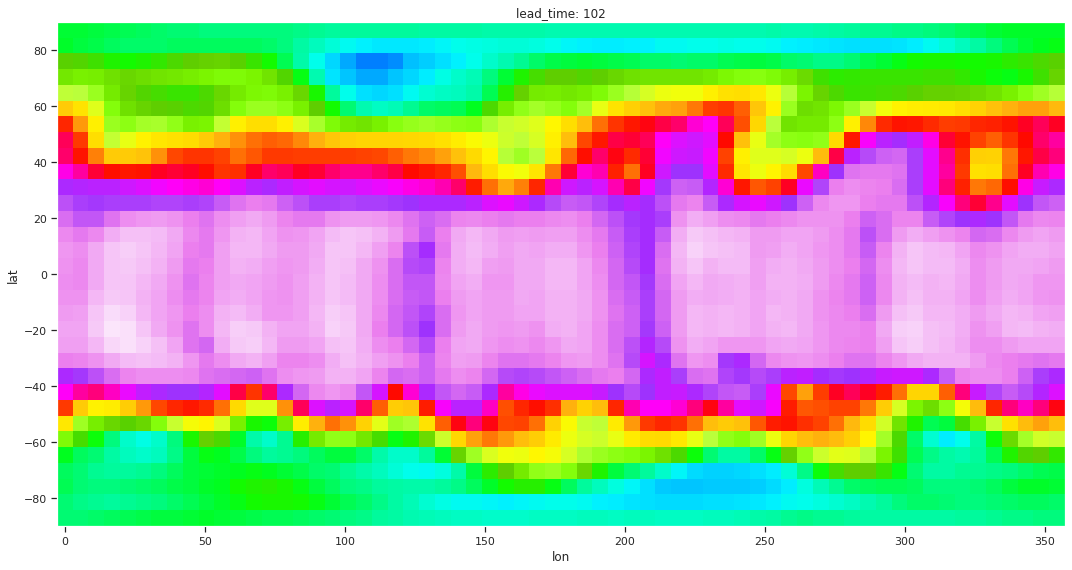
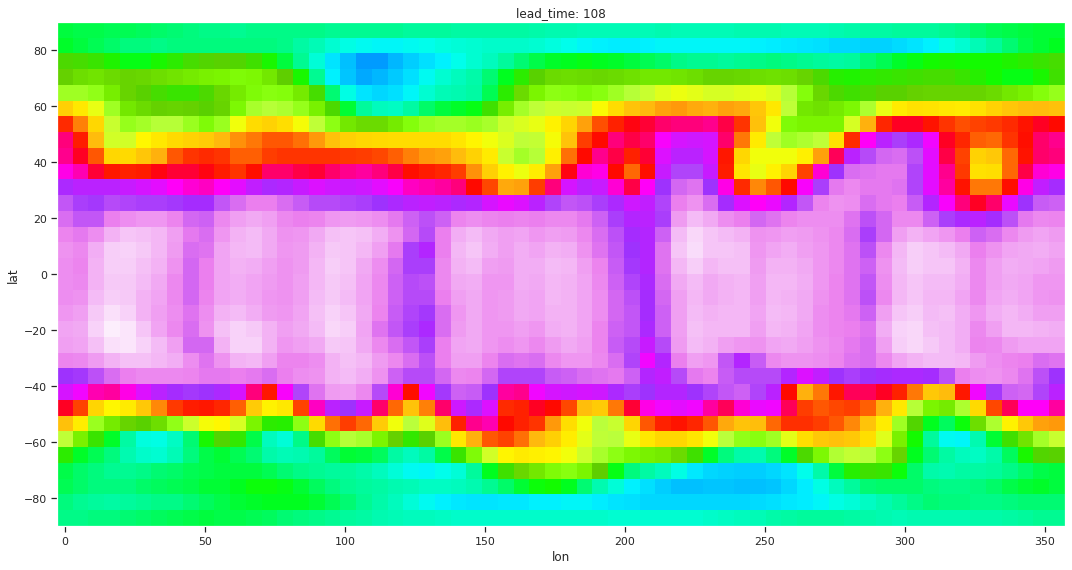
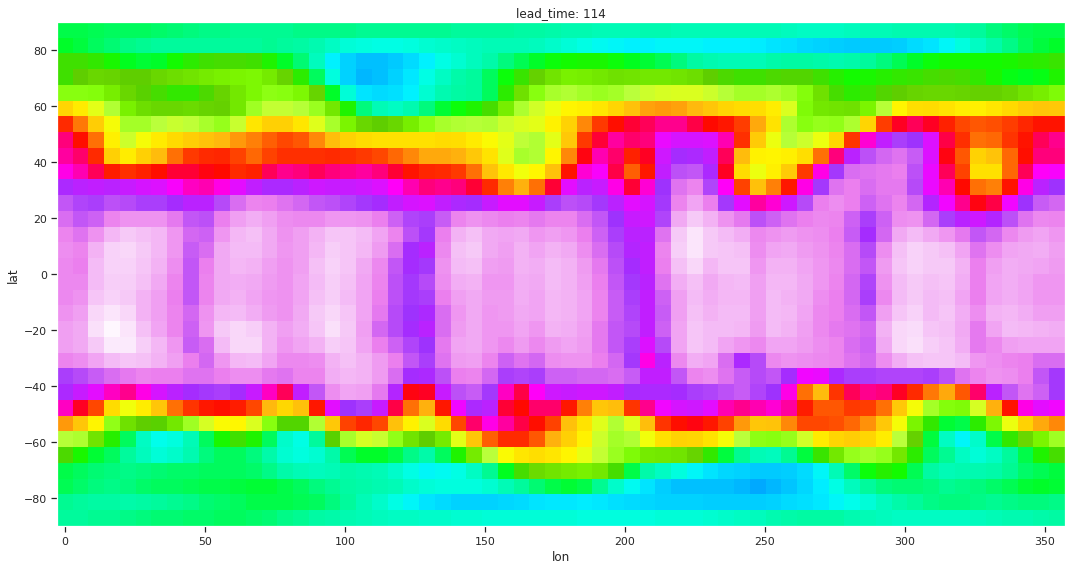
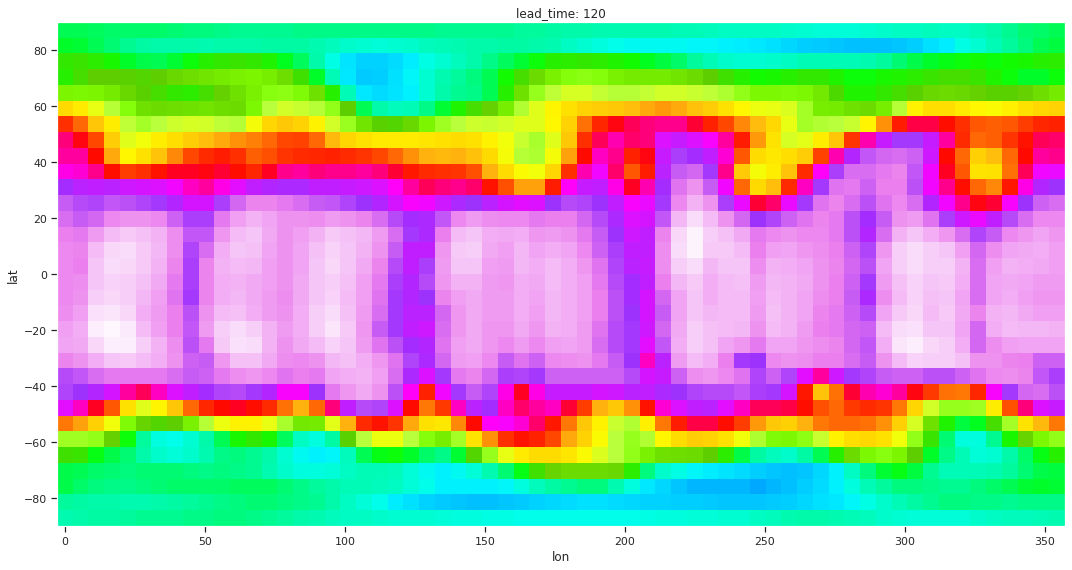

In [39]:
%%output holomap='scrubber'
img

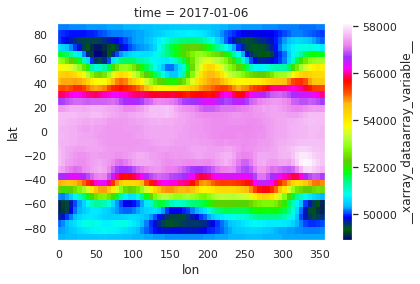

In [42]:
fc_lr_5d.isel(time=0).plot(cmap='gist_ncar')

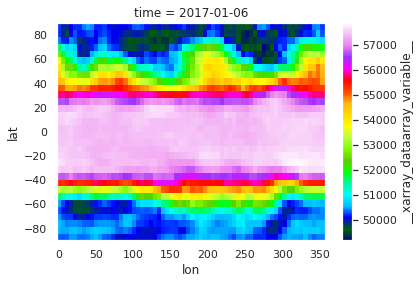

In [41]:
fc_cnn_5d.isel(time=0).plot(cmap='gist_ncar')

## Compute RMSE

In [25]:
rmses_persistence = evaluate_iterative_forecast(fc_persistence, z500_validation).load()
rmse_climatology = compute_weighted_rmse(fc_climatology, z500_validation).load()
rmse_weekly_climatology = compute_weighted_rmse(fc_weekly_climatology, z500_validation).load()

In [26]:
rmses_lr_6h_iter = evaluate_iterative_forecast(fc_lr_6h_iter, z500_validation).load()
rmse_lr_3d = compute_weighted_rmse(fc_lr_3d, z500_validation).load()
rmse_lr_5d = compute_weighted_rmse(fc_lr_5d, z500_validation).load()

In [75]:
lead_time = 5*24
fc1 = fc_cnn_6h_iter.sel(lead_time=lead_time)
fc2 = fc_lr_6h_iter.sel(lead_time=lead_time)

In [76]:
fc1['time'] = fc1.time + np.timedelta64(int(lead_time), 'h')
fc2['time'] = fc2.time + np.timedelta64(int(lead_time), 'h')

In [77]:
time = '2018-01-01T00'
diff1 = (fc1 - z500_validation).sel(time=time)
diff2 = (fc2 - z500_validation).sel(time=time)

In [78]:
rmse1 = np.sqrt(np.mean(diff1**2)).load()
rmse2 = np.sqrt(np.mean(diff2**2)).load()
rmse1, rmse2

(<xarray.DataArray ()>
 array(1091.9156, dtype=float32)
 Coordinates:
     time       datetime64[ns] 2018-01-01
     lead_time  int64 120, <xarray.DataArray ()>
 array(953.9748, dtype=float32)
 Coordinates:
     time       datetime64[ns] 2018-01-01
     lead_time  int64 120)

In [129]:
rmses1, rmses2 = [], []
time = '2018-06-01T00'
for lead_time in range(6, 121, 6):
    fc1 = fc_cnn_6h_iter.sel(lead_time=lead_time, time=time)
    fc2 = fc_lr_6h_iter.sel(lead_time=lead_time, time=time)
    fc1['time'] = fc1.time + np.timedelta64(int(lead_time), 'h')
    fc2['time'] = fc2.time + np.timedelta64(int(lead_time), 'h')
    rmses1.append(compute_weighted_rmse(fc1, z500_validation.sel(time=time), ['lat', 'lon']).values)
    rmses2.append(compute_weighted_rmse(fc2, z500_validation.sel(time=time), ['lat', 'lon']).values)

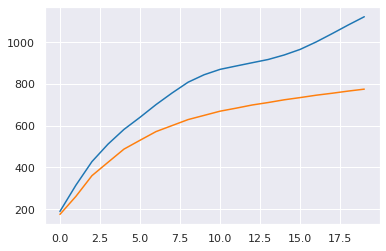

In [130]:
plt.plot(rmses1)
plt.plot(rmses2)

In [103]:
rmses_cnn_6h_iter

<xarray.DataArray (lead_time: 20)>
array([  91.31628502,  143.62309297,  193.79876342,  242.3902929 ,
        293.65614755,  344.48741341,  394.1359211 ,  443.17640135,
        493.03541729,  543.53774787,  593.95759323,  644.17885944,
        694.7409122 ,  745.55334339,  796.1169201 ,  846.04430904,
        895.4071642 ,  944.12723517,  991.92063672, 1038.44246705])
Coordinates:
  * lead_time  (lead_time) int64 6 12 18 24 30 36 42 ... 90 96 102 108 114 120

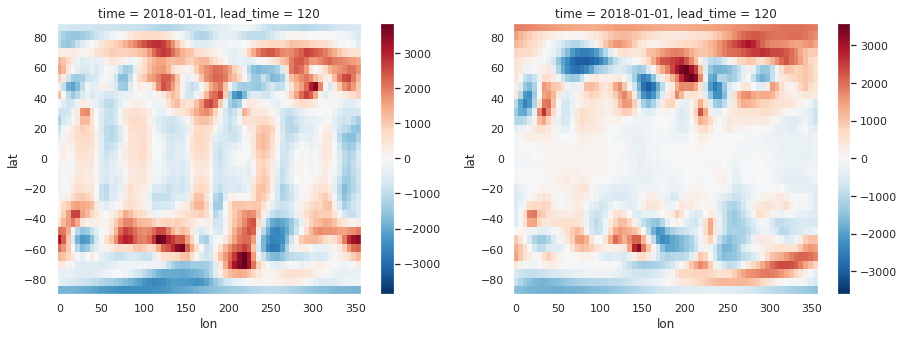

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
diff1.plot(ax=ax1)
diff2.plot(ax=ax2);

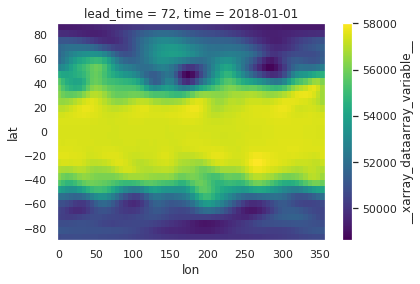

In [62]:
fc2.sel(time='2018-01-01T00').plot()

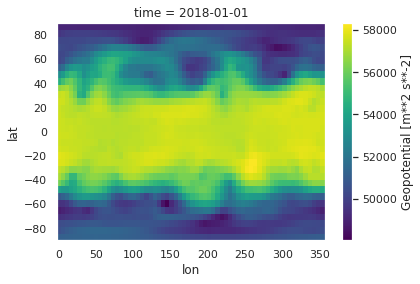

In [61]:
z500_validation.sel(time='2018-01-01T00').plot()

In [51]:
compute_weighted_rmse(fc, z500_validation).load()

<xarray.DataArray ()>
array(1038.44246705)
Coordinates:
    lead_time  int64 120

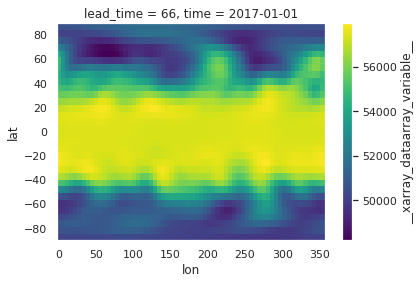

In [41]:
fc_lr_6h_iter.isel(lead_time=10, time=0).plot()

In [27]:
rmses_cnn_6h_iter = evaluate_iterative_forecast(fc_cnn_6h_iter, z500_validation).load()
rmse_cnn_3d = compute_weighted_rmse(fc_cnn_3d, z500_validation).load()
rmse_cnn_5d = compute_weighted_rmse(fc_cnn_5d, z500_validation).load()

In [28]:
rmses_tigge = evaluate_iterative_forecast(fc_tigge, z500_validation).load()

In [85]:
rmses_cnn_6h_iter

<xarray.DataArray (lead_time: 20)>
array([  91.31628502,  143.62309297,  193.79876342,  242.3902929 ,
        293.65614755,  344.48741341,  394.1359211 ,  443.17640135,
        493.03541729,  543.53774787,  593.95759323,  644.17885944,
        694.7409122 ,  745.55334339,  796.1169201 ,  846.04430904,
        895.4071642 ,  944.12723517,  991.92063672, 1038.44246705])
Coordinates:
  * lead_time  (lead_time) int64 6 12 18 24 30 36 42 ... 90 96 102 108 114 120

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [90]:
lr.fit(rmses_cnn_6h_iter.lead_time.values[None], rmses_cnn_6h_iter.values[None])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
preds = lr.predict(rmses_cnn_6h_iter.lead_time.values[None])[0]

In [96]:
rmses_cnn_6h_iter.values-preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

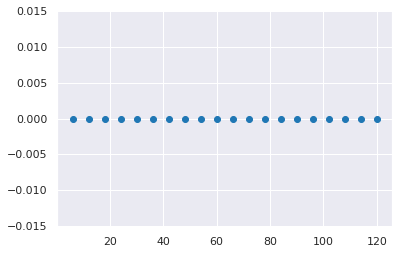

In [95]:
plt.scatter(rmses_cnn_6h_iter.lead_time.values, rmses_cnn_6h_iter.values-preds)


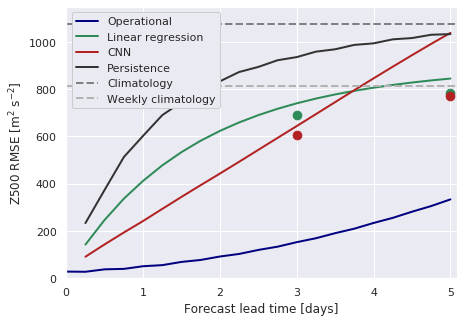

In [29]:
c_lr = 'seagreen'
c_cnn = 'firebrick'
c_tigge = 'navy'
c_persistence = '0.2'
c_climatology = '0.5'
c_weekly_climatology = '0.7'
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
rmses_tigge.plot(c=c_tigge, label='Operational', lw=2)
rmses_lr_6h_iter.plot(c=c_lr, label='Linear regression', lw=2)
rmses_cnn_6h_iter.plot(c=c_cnn, label='CNN', lw=2)
rmses_persistence.plot(c=c_persistence, label='Persistence', lw=2)
ax.axhline(rmse_climatology, ls='--', c=c_climatology, label='Climatology', lw=2)
ax.axhline(rmse_weekly_climatology, ls='--', c=c_weekly_climatology, label='Weekly climatology', lw=2)
plt.scatter([3*24], [rmse_lr_3d], c=c_lr, s=75)
plt.scatter([5*24], [rmse_lr_5d], c=c_lr, s=75)
plt.scatter([3*24], [rmse_cnn_3d], c=c_cnn, s=75)
plt.scatter([5*24], [rmse_cnn_5d], c=c_cnn, s=75)
plt.legend(loc=2, framealpha=1)
plt.xlim(0, 122)
plt.ylim(0, 1150)
plt.xticks(range(0, 121, 24), range(0, 6))
plt.xlabel('Forecast lead time [days]')
plt.ylabel(r'Z500 RMSE [m$^2$ s$^{-2}$]');